In [1]:
%load_ext autoreload

In [2]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import build_dataset
import dataframe_exploration

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
appended
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [3]:
wt_instance = build_dataset.wt_data.load_instance("WTG01",load_minimal=False)



Loading WTG01...
Loaded WTG01


In [4]:
# ----- Used to create and build a csv file of the data set -----

'''
df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=2500,plot=False, bins=50, 
                                                         plot_vertical_lines=False)

build_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_power>2500_WTG01.csv')
'''

"\ndf = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', \n                                                         power_threshold=2500,plot=False, bins=50, \n                                                         plot_vertical_lines=False)\n\nbuild_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_power>2500_WTG01.csv')\n"

### Load data set from csv file

In [4]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG01.csv'
data = pd.read_csv(path)
data.head()

AvgPower     ActPower  AvgRotSpeed  WindSpeed  NacelleDirection  \
0  2500.973877  3090.899902  1511.167622       13.0        232.899994   
1  2565.207520  2660.399902  1472.724506        9.9         53.900002   
2  2861.552002  3301.899902  1499.039959       12.0        262.399994   
3  3073.377930  3307.399902  1492.741102       15.1        245.600006   
4  2630.640625  2335.399902  1458.801583        7.3        296.399994   

   GbxHssRr_RMS_0  GbxHssRr_RMS_1  GbxHssRr_RMS_2  GbxHssRr_RMS_3  \
0        0.529806        0.396315        0.926229        0.784296   
1        0.519244        0.297510        0.857385        0.771858   
2        0.537803        0.492195        0.918529        0.819567   
3        0.655595        0.499201        0.900849        0.873749   
4        0.552800        0.312219        0.926188        0.819309   

   GbxHssRr_RMS_4  ...  GbxHssRr_RMS_40  GbxHssRr_RMS_41  GbxHssRr_RMS_42  \
0        1.689014  ...         1.107841         1.689887         1.884569   
1        1.000674  ...         1.078498         1.583077         1.868731   
2        2.557961  ...         1.044200         1.527561         1.749744   
3        2.765626  ...         1.051084         1.471833         1.688985   
4        1.080637  ...         1.040459         1.557635         2.074641   

   GbxHssRr_RMS_43  GbxHssRr_RMS_44  GbxHssRr_RMS_45  GbxHssRr_RMS_46  \
0         2.108670         3.132671         2.855787         3.668806   
1         2.318457         2.936169         2.918674         3.745910   
2         2.021772         2.802417         2.649571         3.407016   
3         2.041691         2.650884         2.545420         3.355640   
4         2.154511         2.639528         2.810245         3.425632   

   GbxHssRr_RMS_47  GbxHssRr_RMS_48  GbxHssRr_RMS_49  
0         3.355471         1.887401         0.927872  
1         3.281026         1.667363         0.995451  
2         3.057615         1.654562         0.866629  
3         3.010029         1.543250         0.827142  
4         3.298253         1.666922         0.955386  

[5 rows x 55 columns]

### Correlation plot, unfiltered data set

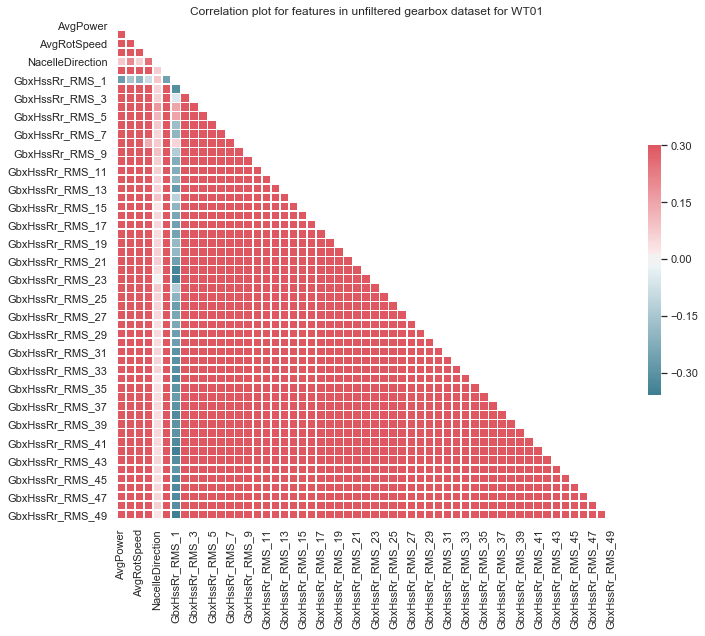

In [6]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG01.csv'
save_to_file_name = "Correlation_plot_wtg01_Gearbox"
plot_title = "Correlation plot for features in unfiltered gearbox dataset for WT01"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

### Correlation plot, filtered data set

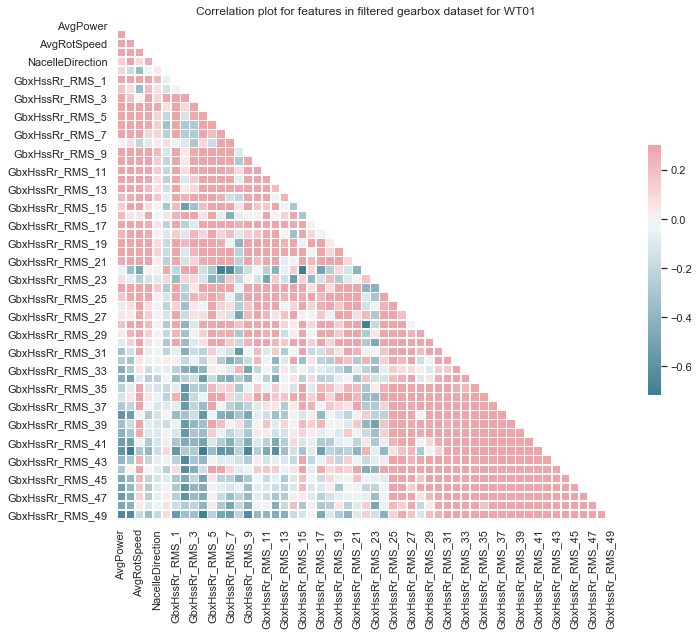

In [7]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG01.csv'
save_to_file_name = "Correlation_plot_wtg01_Gearbox"
plot_title = "Correlation plot for features in filtered gearbox dataset for WT01"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

## Plot average rot speed (high speed shaft) for all intervals with avg_power > 2500

color codes: 
red: hgih rot speed which gives high rms values in bin 5

yellow: low rot speeds which gives high rms values in bin 1,2 or 3. The first line at interval 30 (with very low 
rot speed) has only high rot speed in bin 1

light blue: high rot speed but regular rms values

green horisontal line: 1550 rpm (rotational speed)

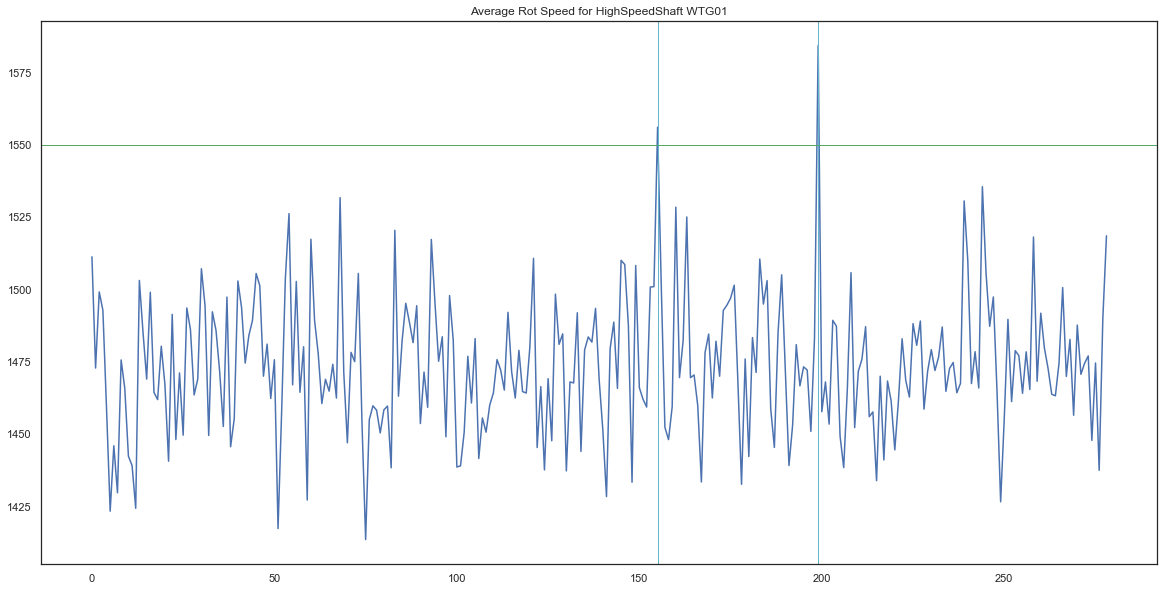

In [8]:
x = np.arange(data.shape[0])
y = data['AvgRotSpeed']
plt.figure(figsize=(20,10))
plt.title('Average Rot Speed for HighSpeedShaft WTG01')
plt.plot(x, y)
plt.axvline(x=155,  c='c', linewidth=1)
plt.axvline(x=199, c='c', linewidth=1)
plt.axhline(y=1550, c='g', linewidth=1)
plt.show()

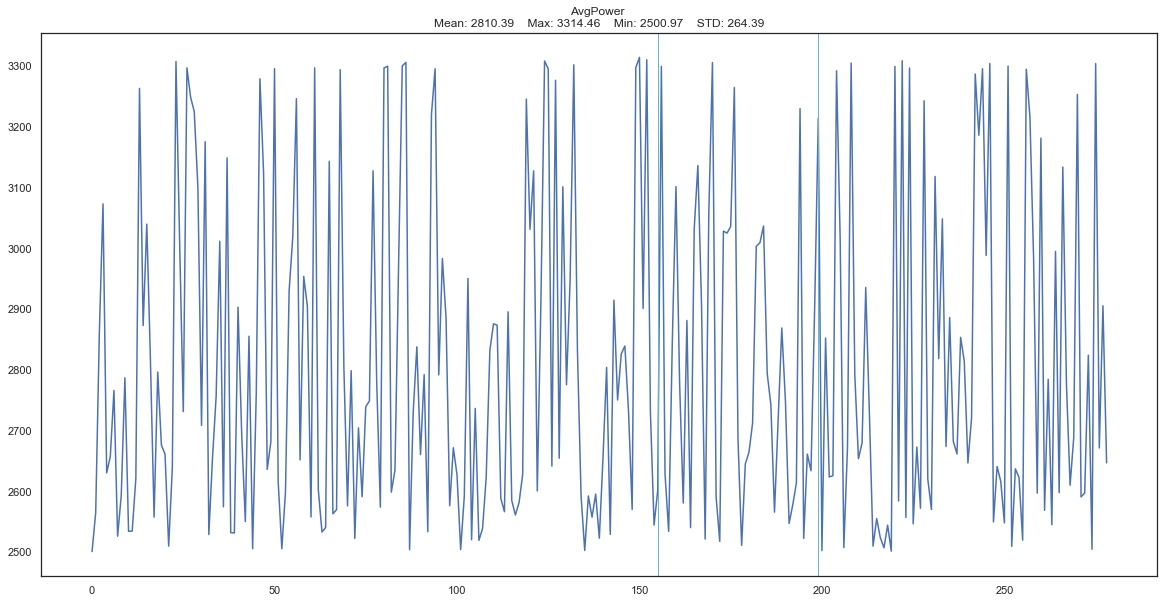

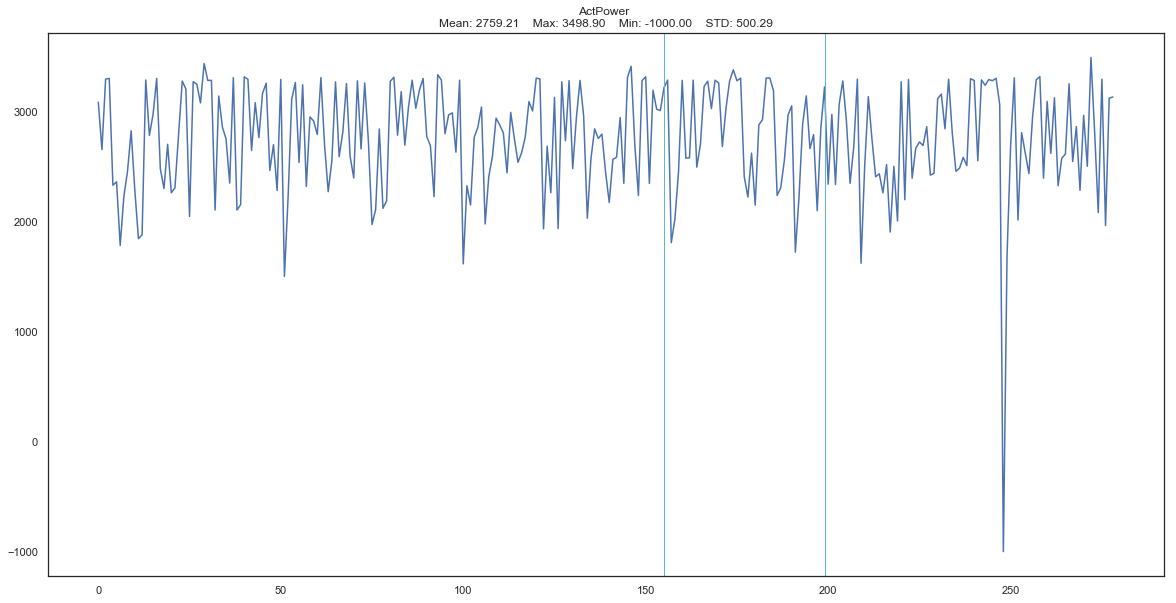

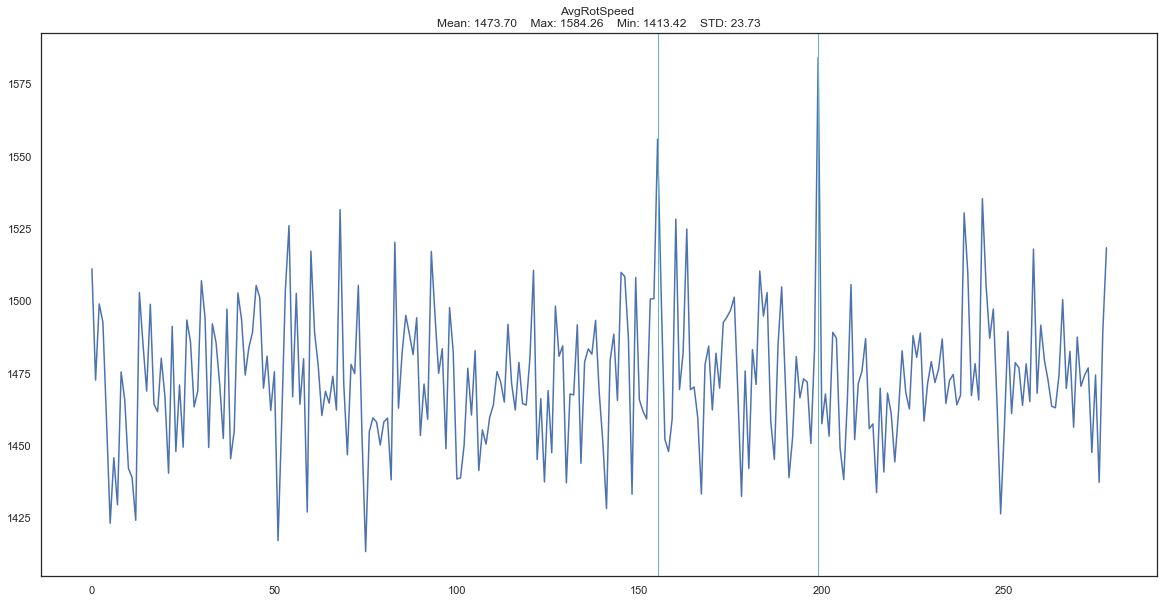

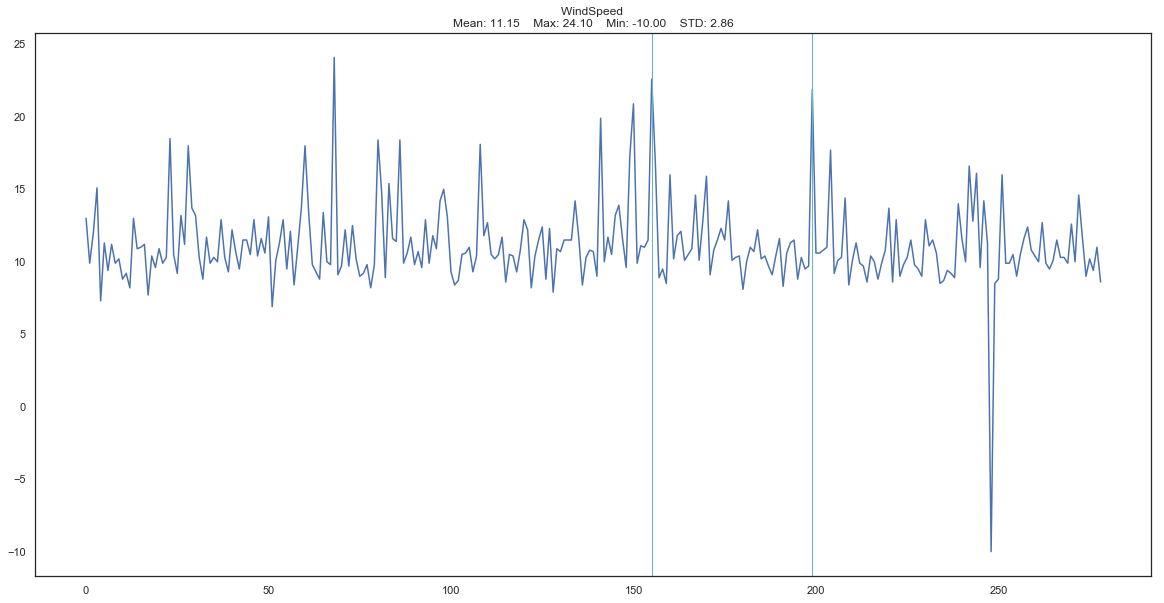

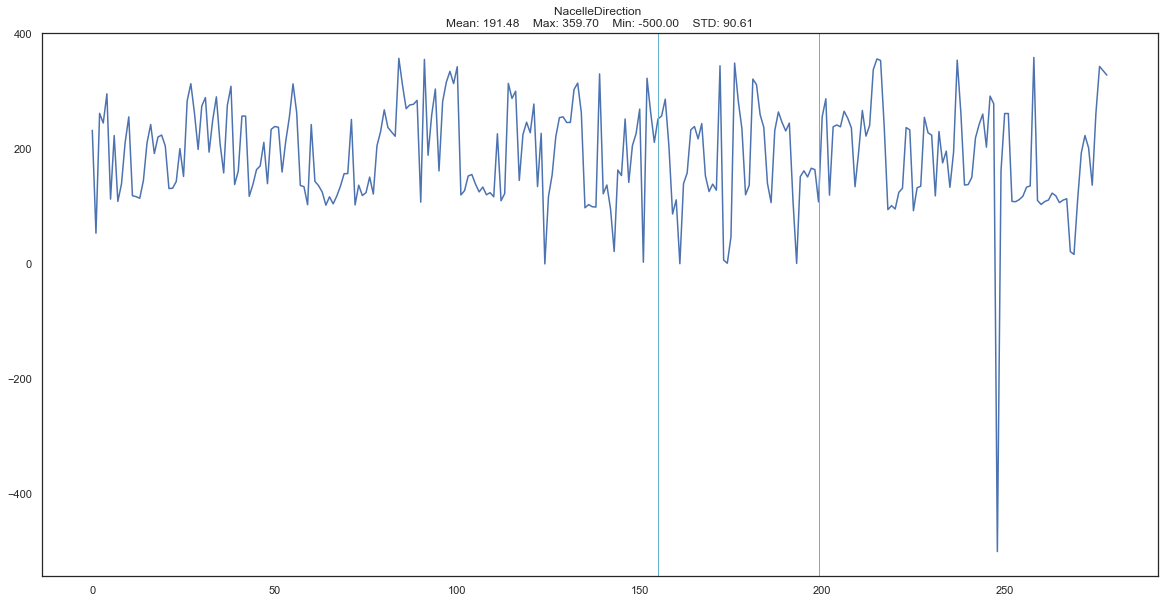

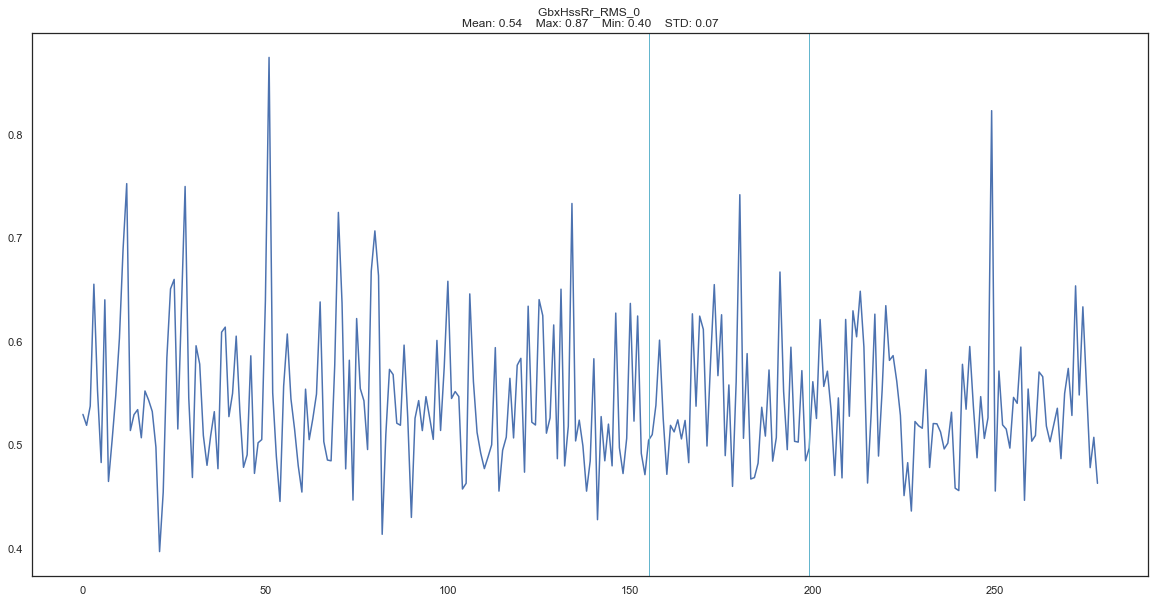

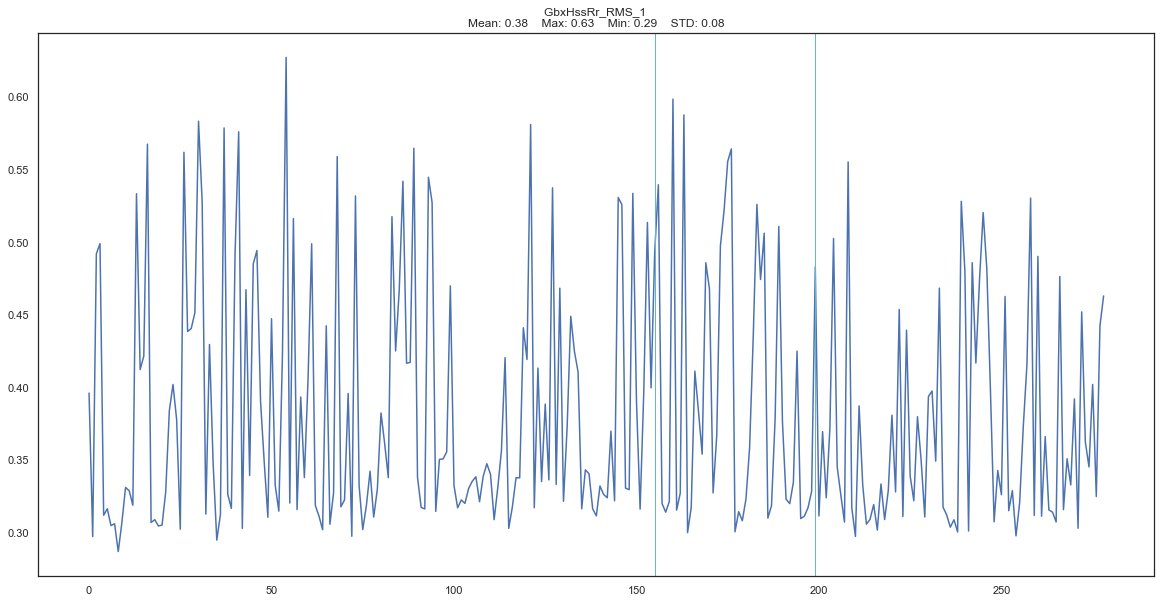

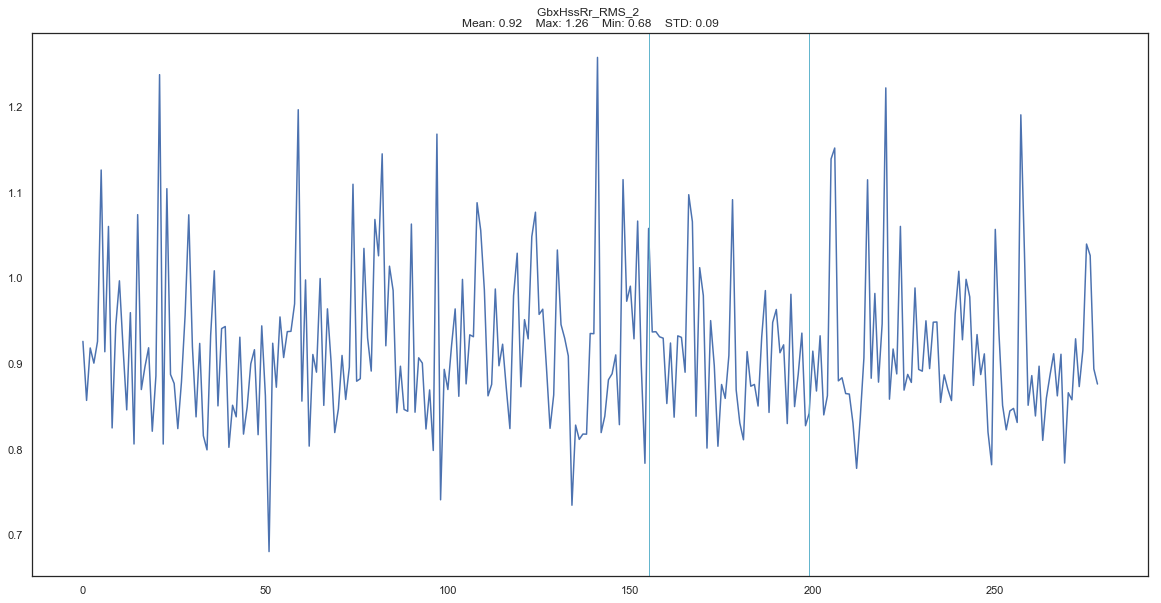

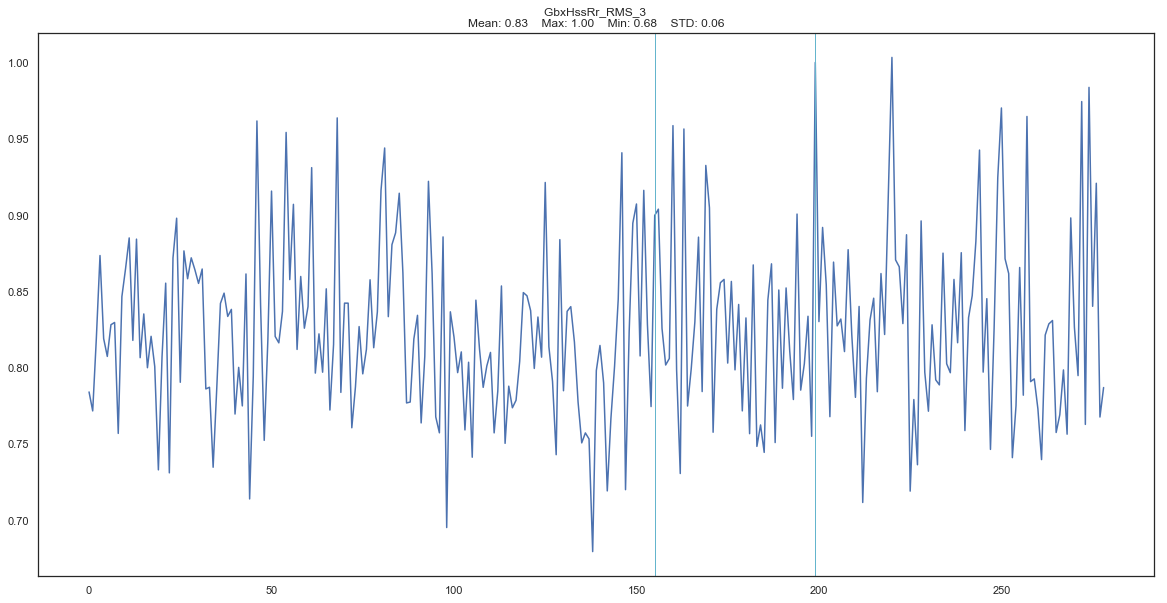

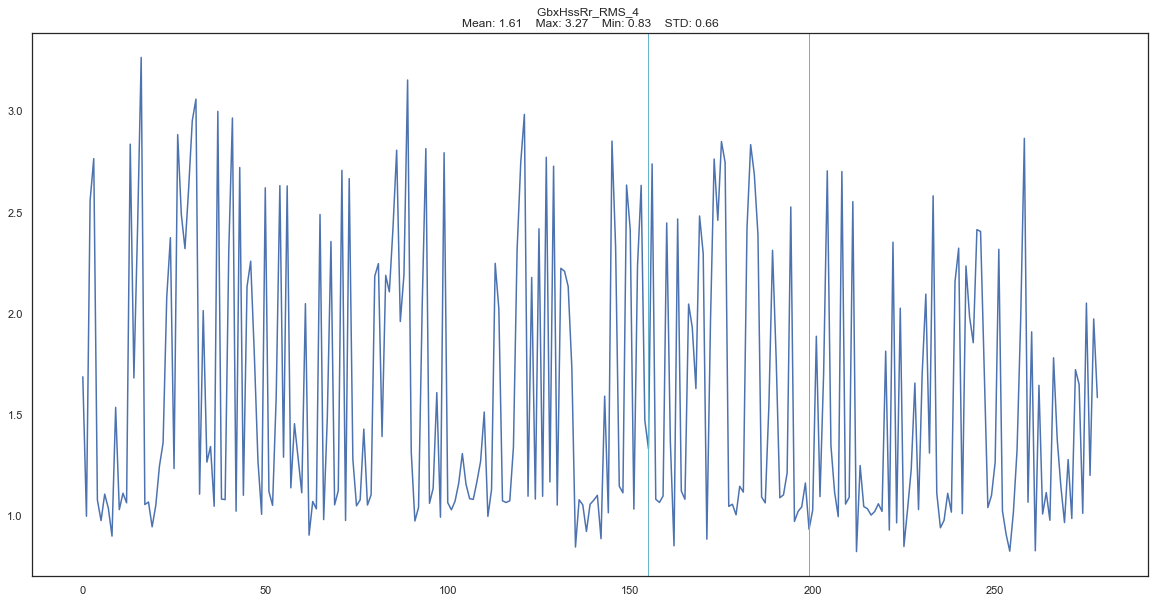

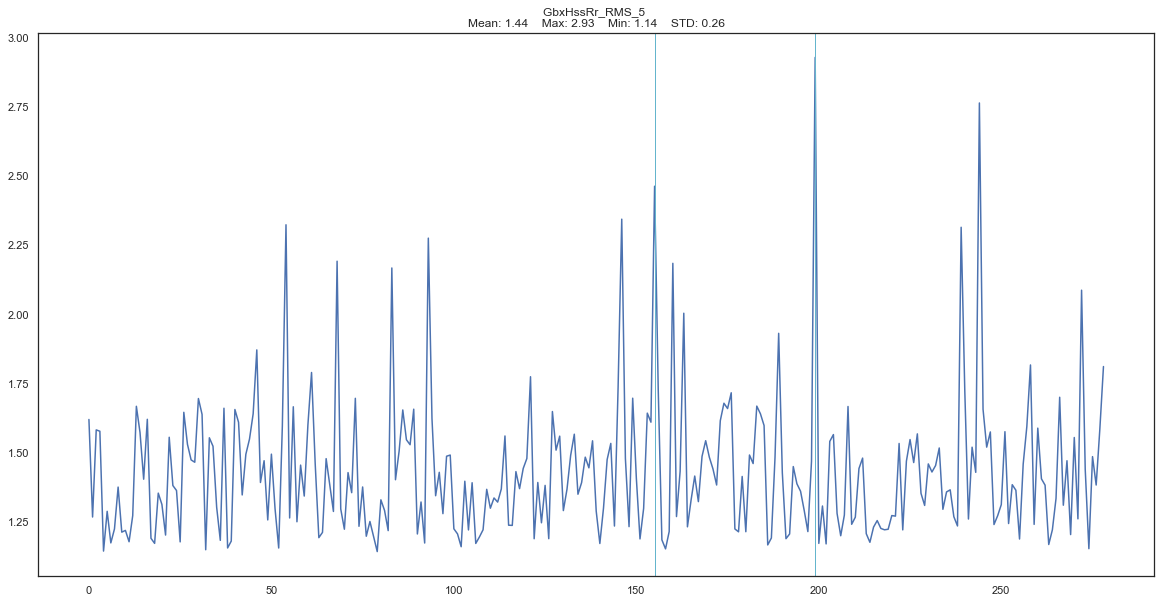

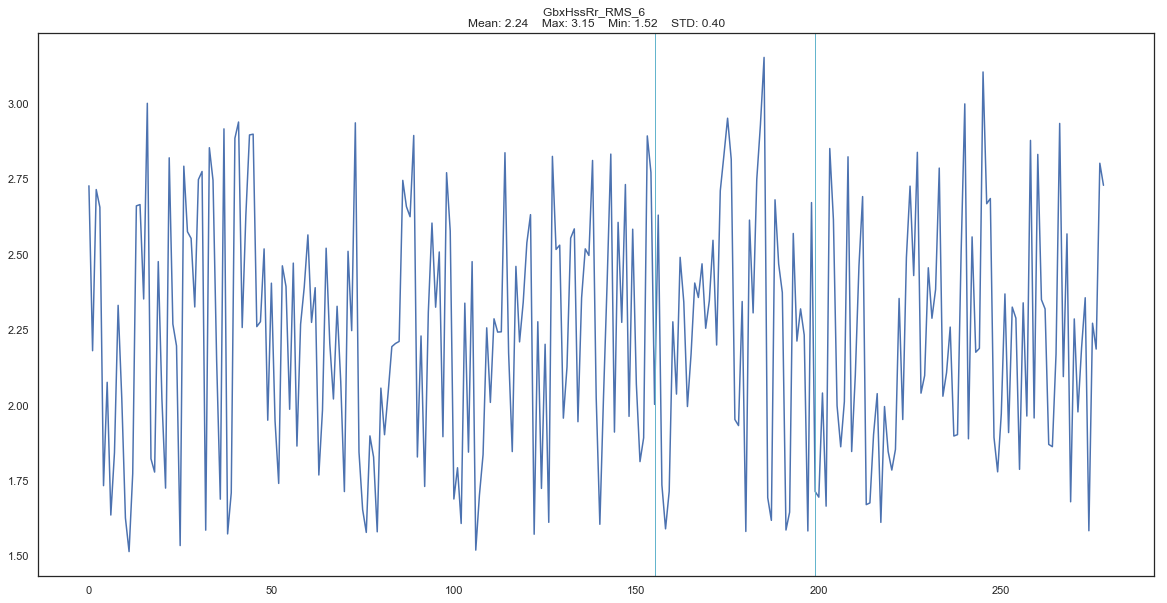

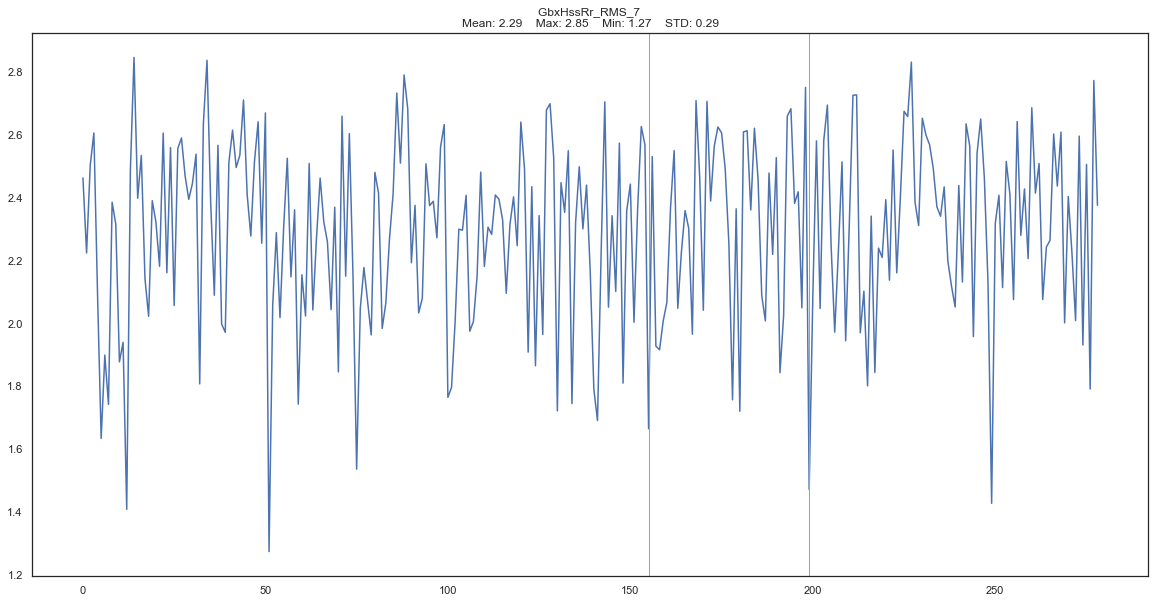

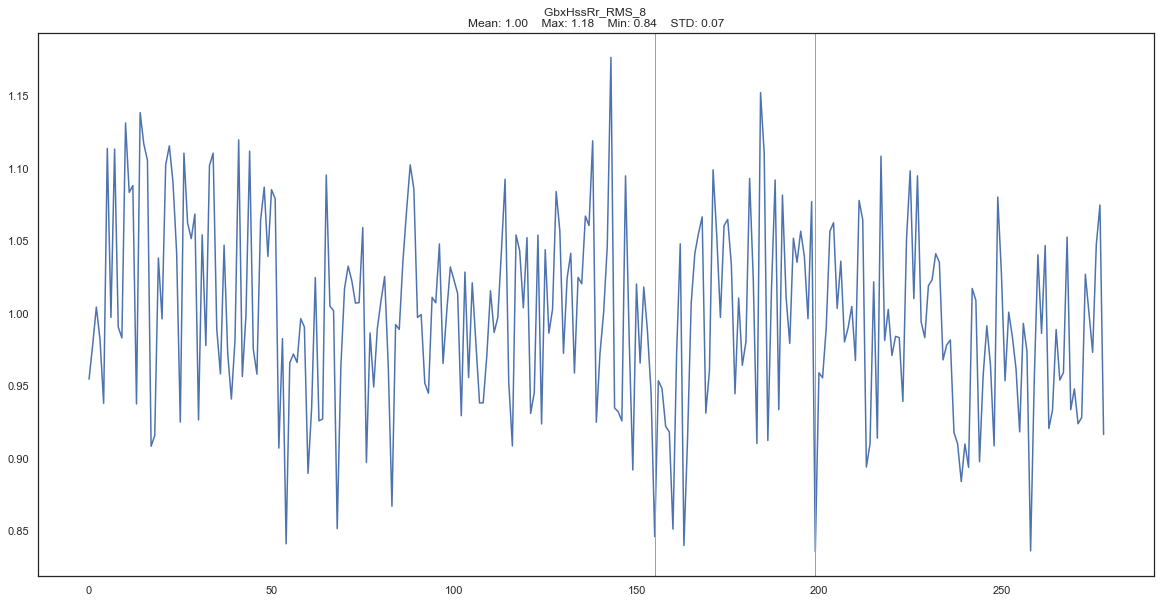

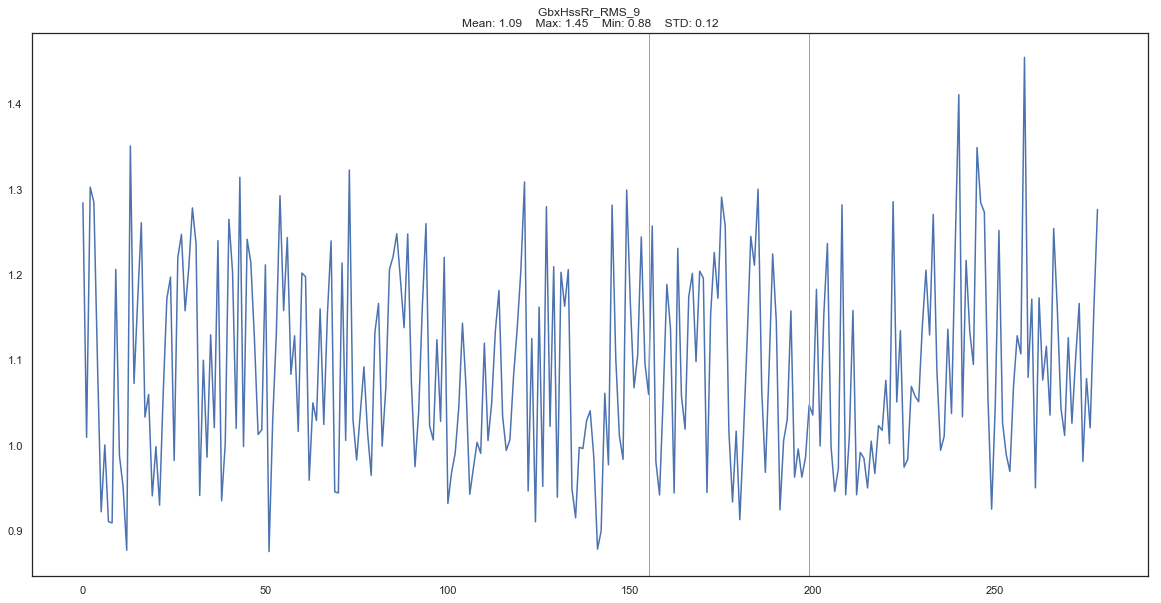

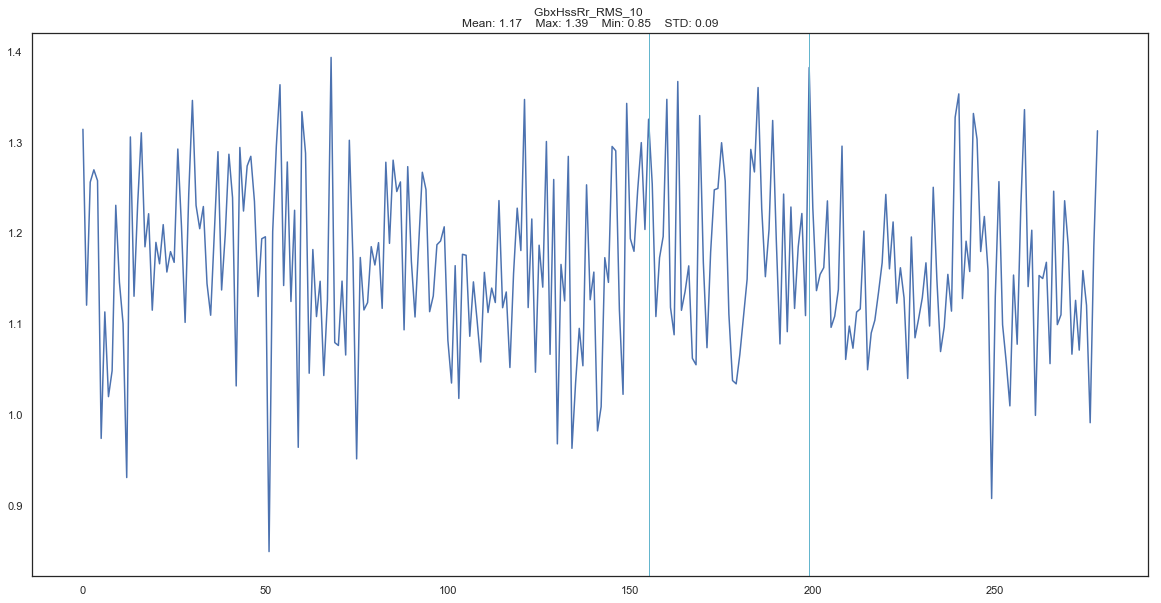

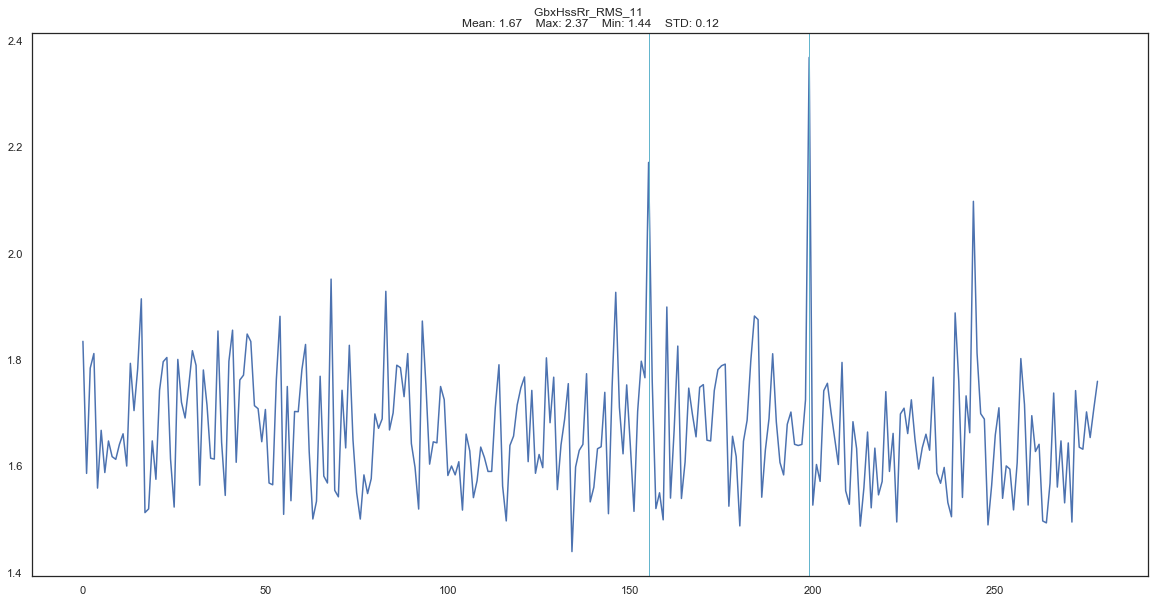

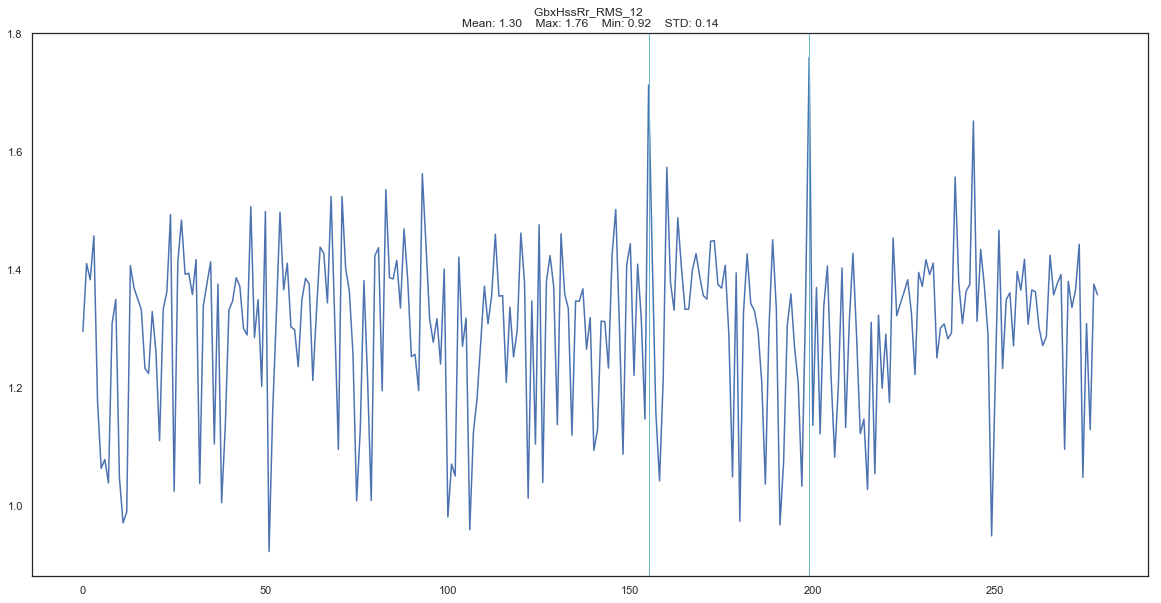

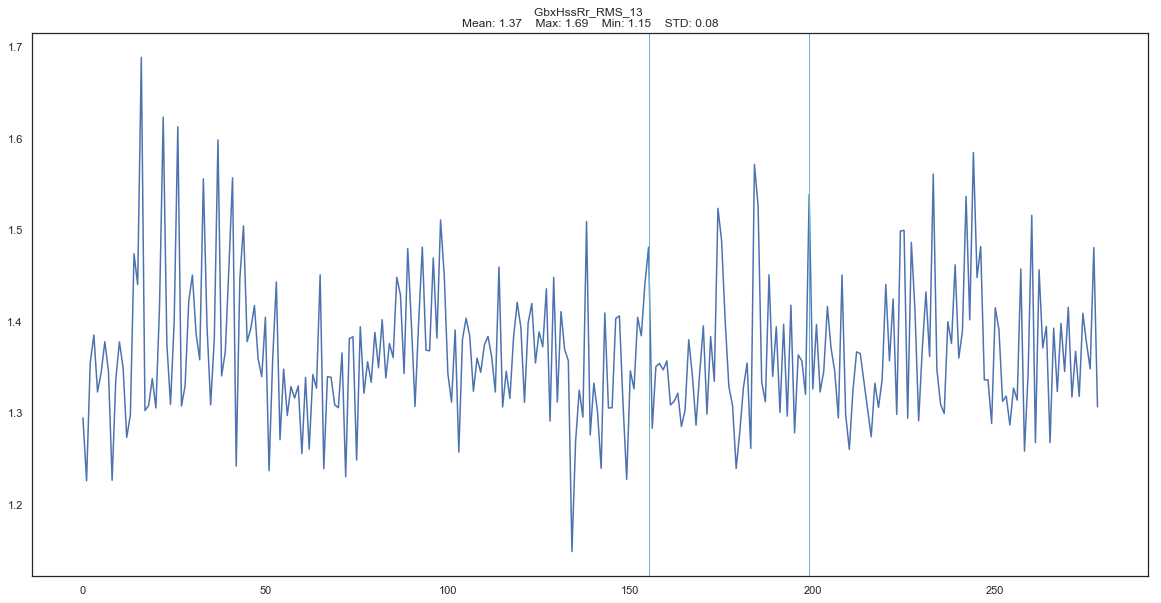

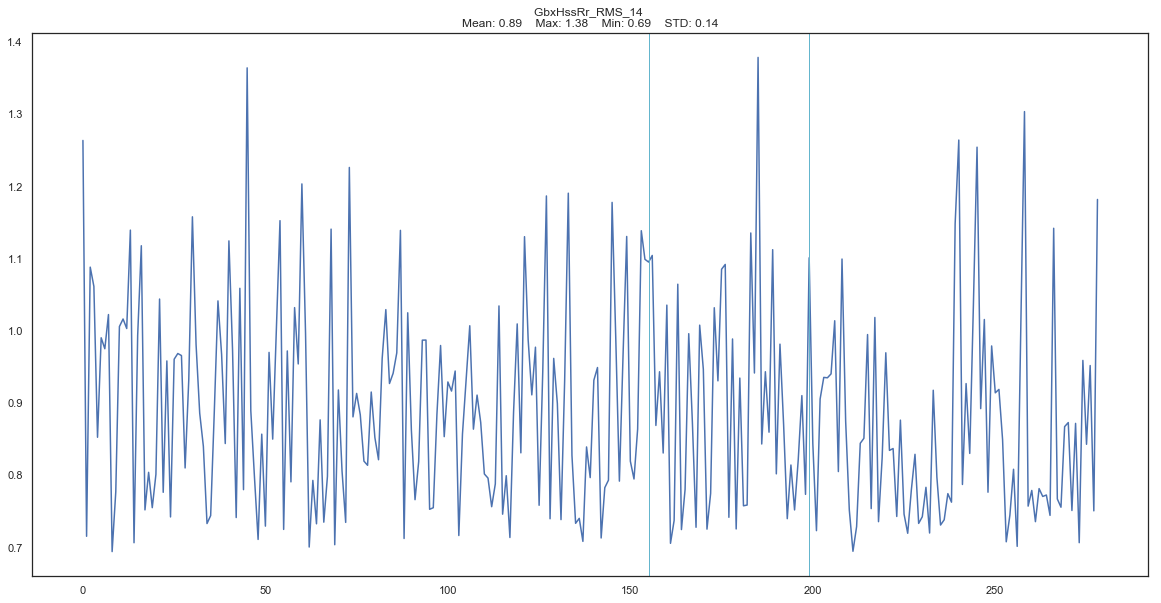

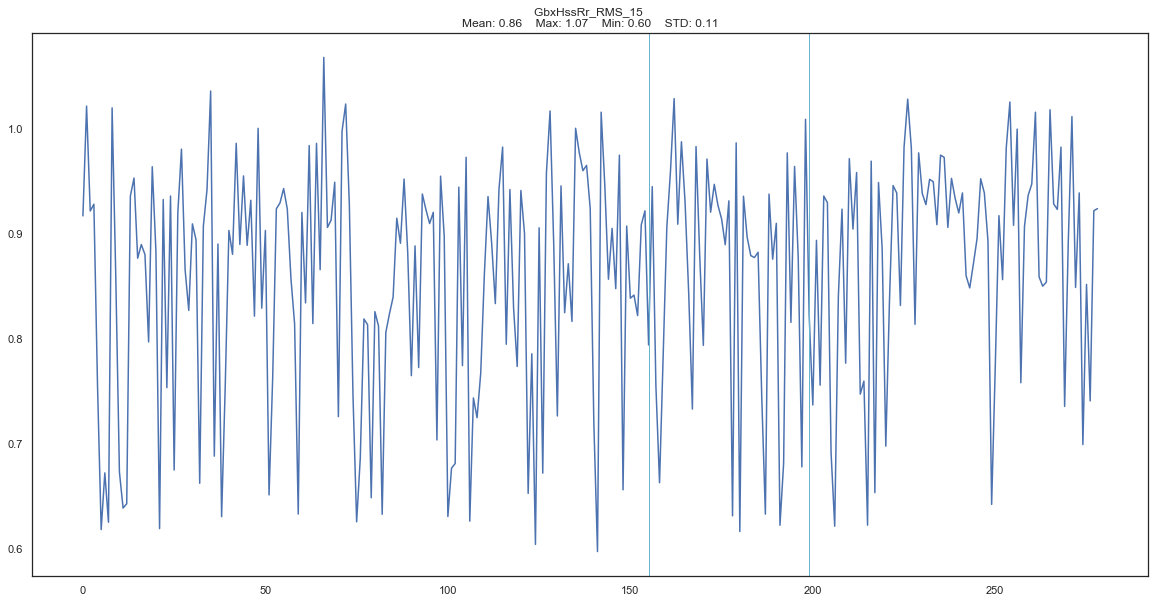

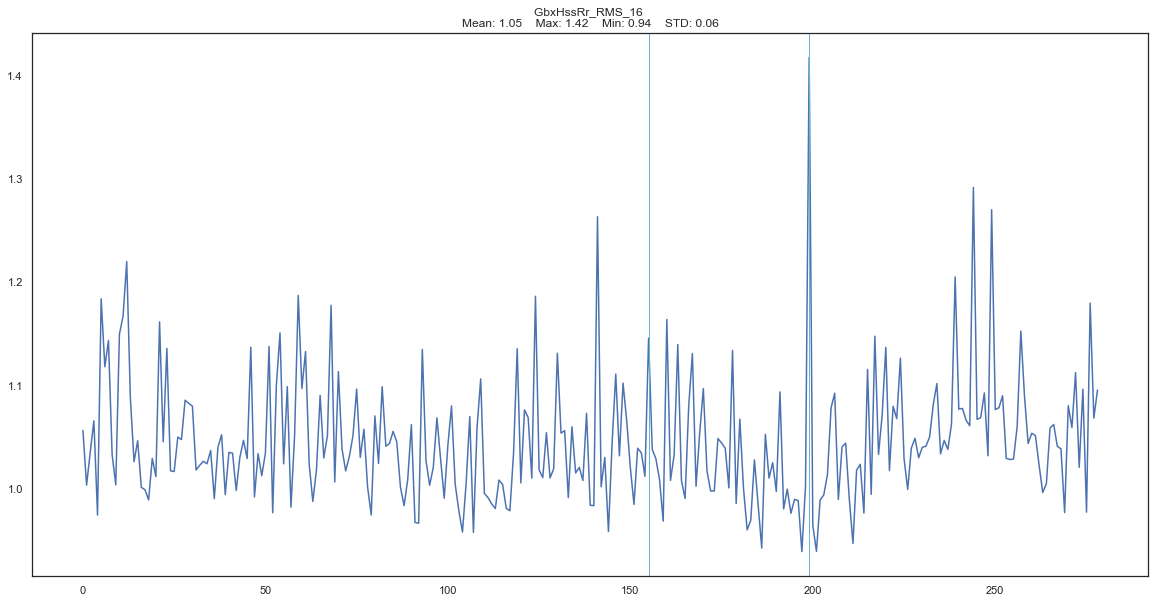

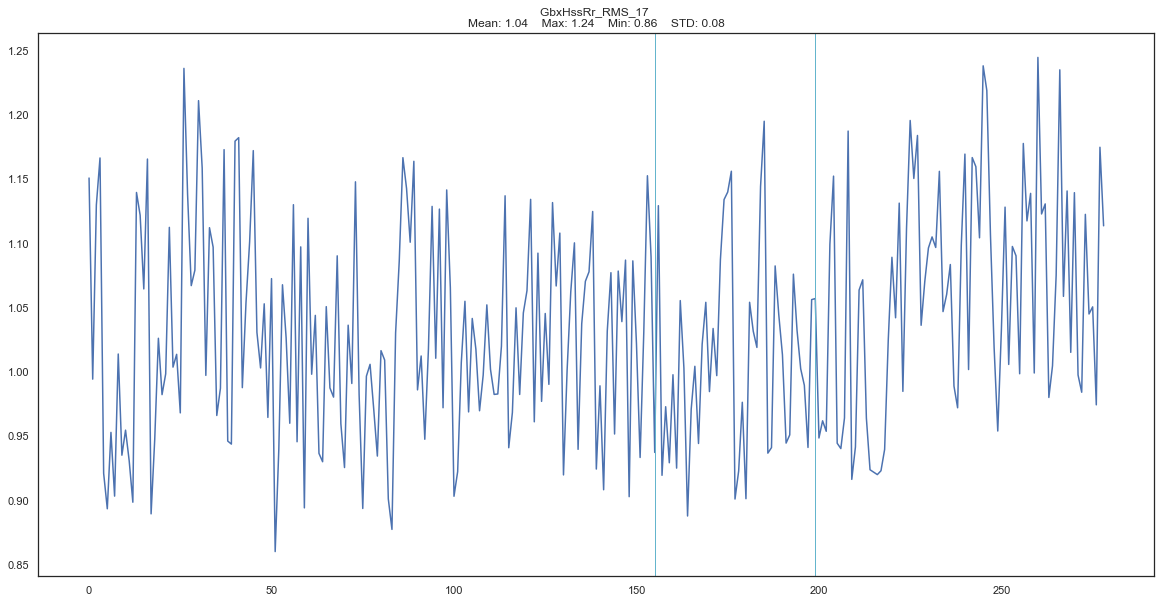

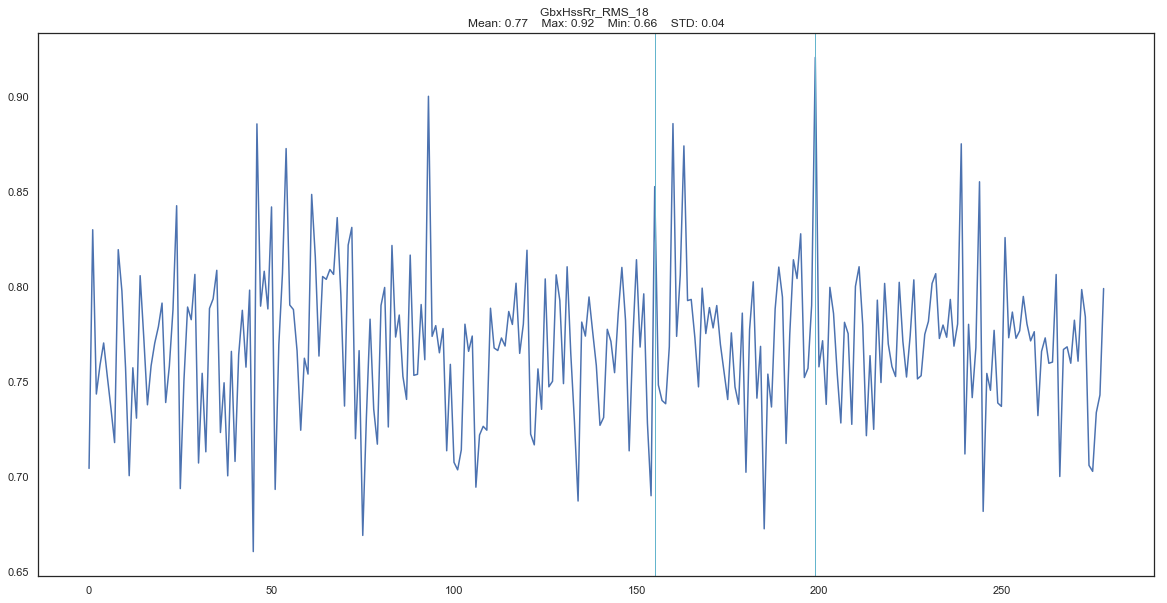

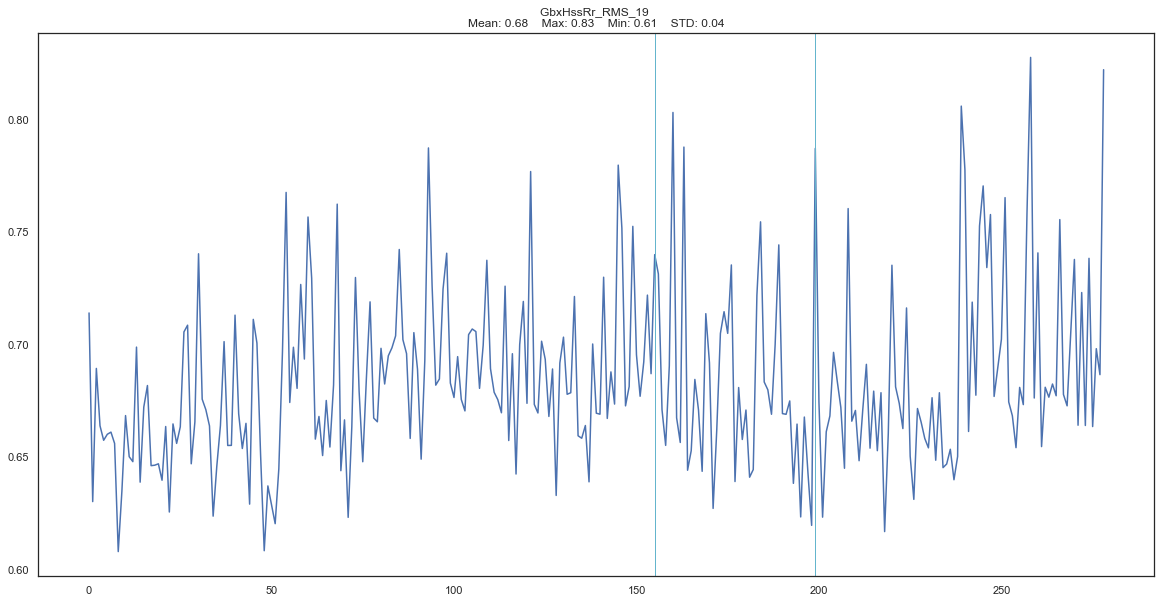

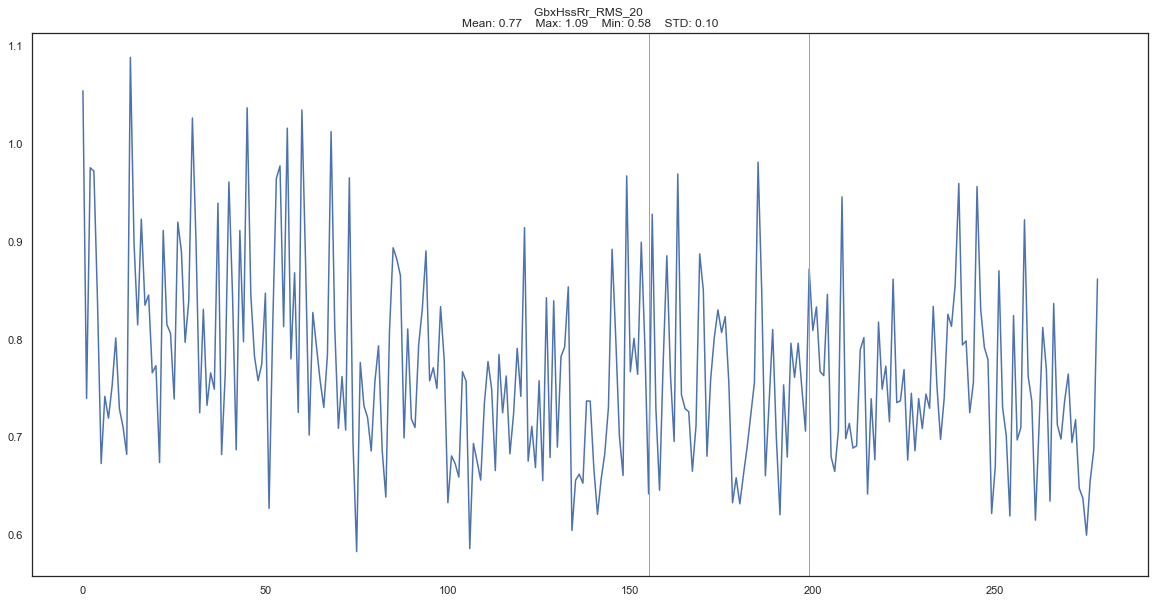

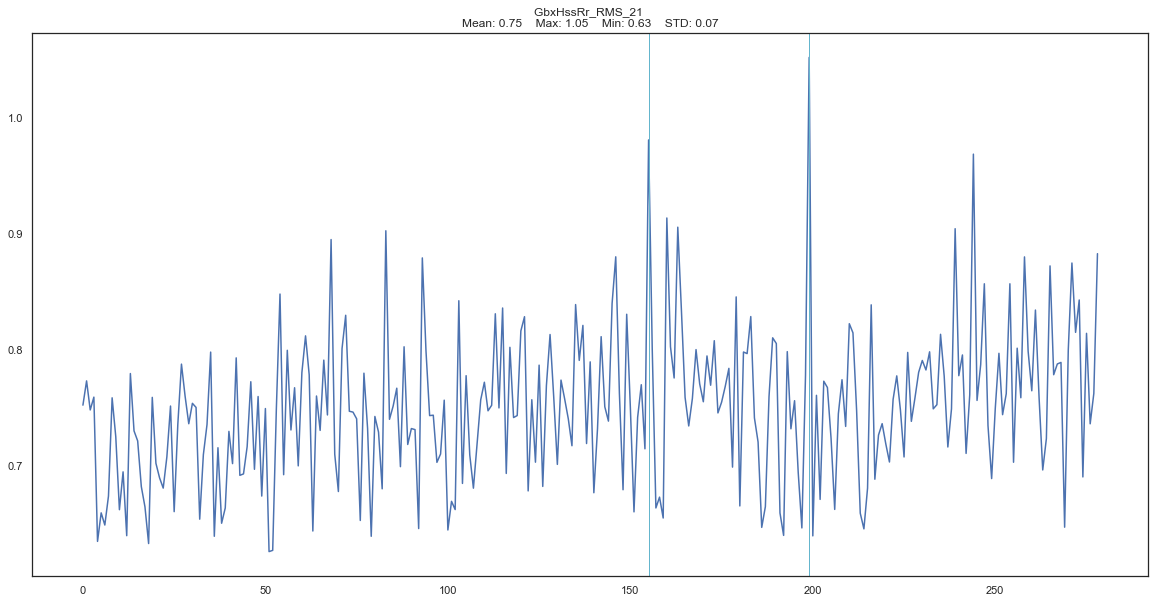

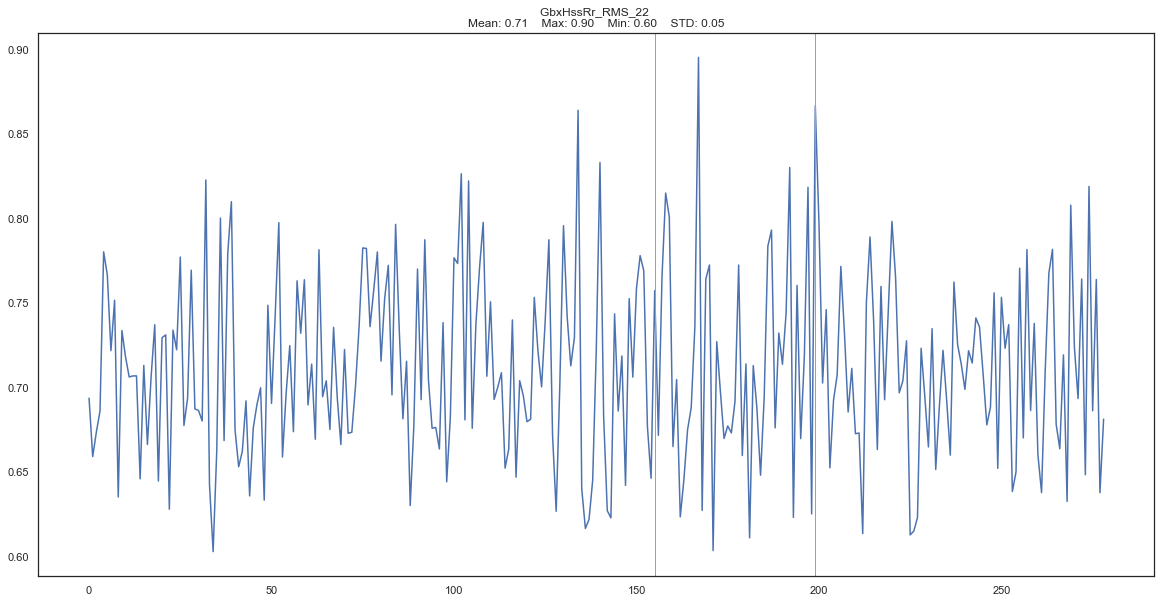

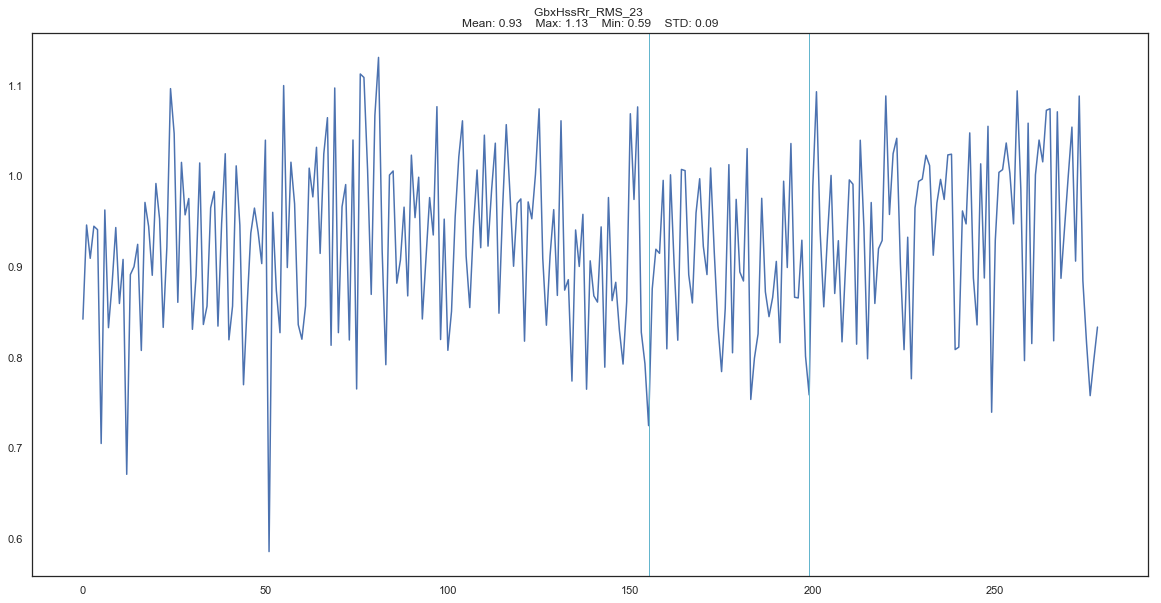

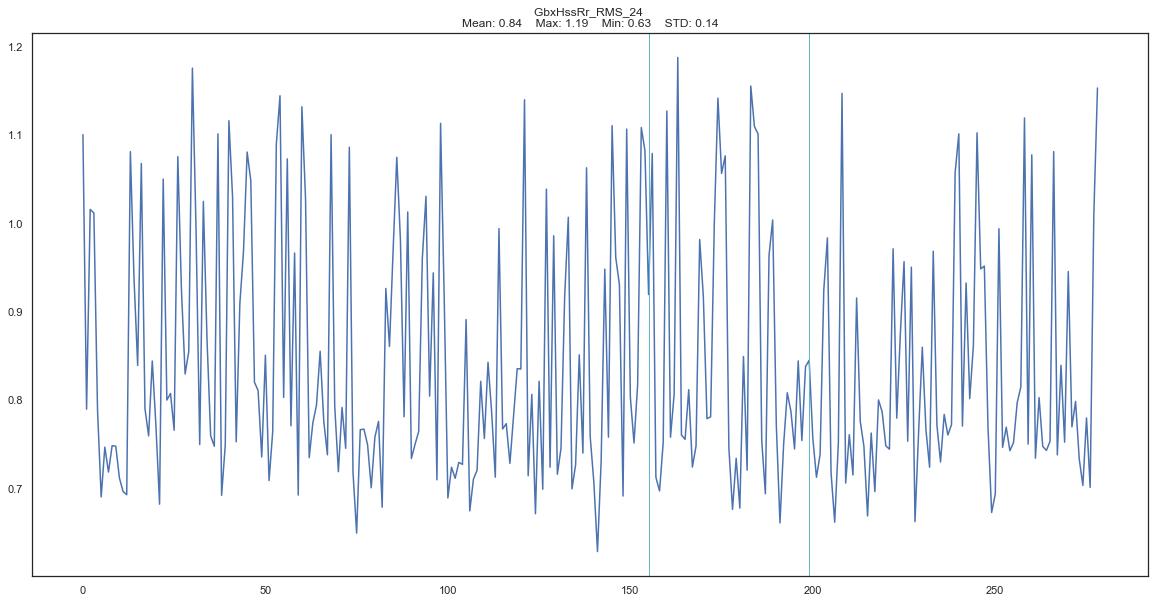

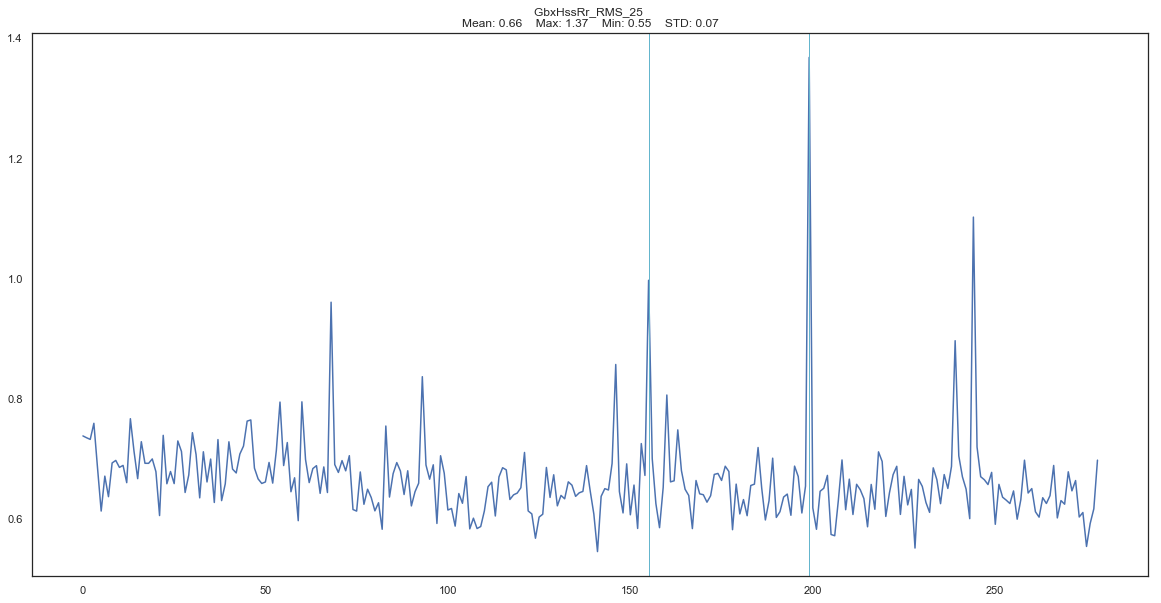

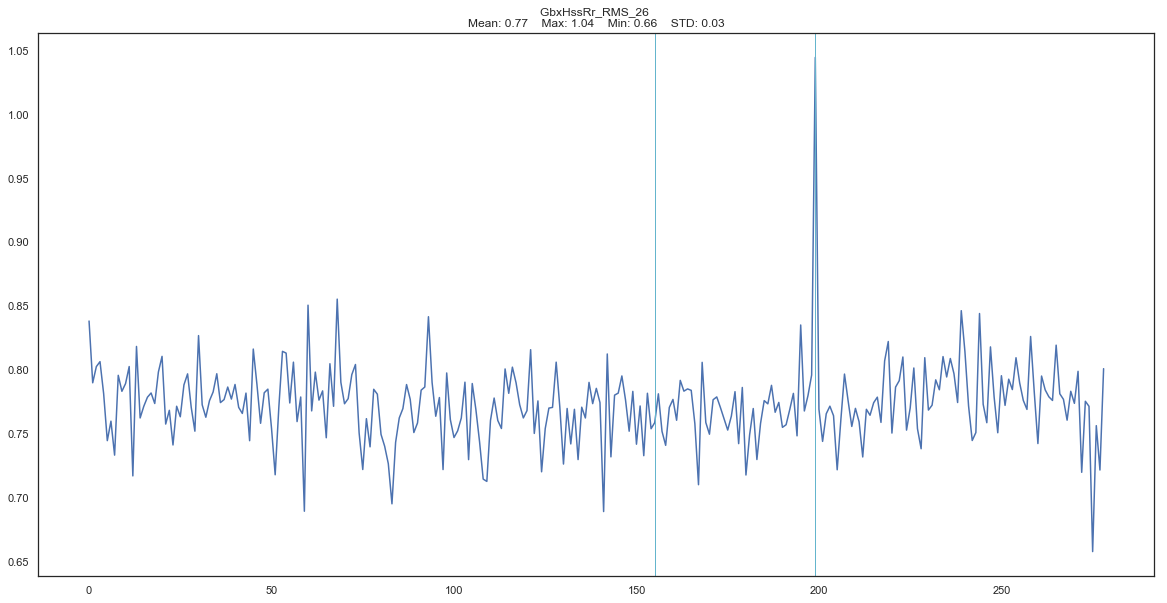

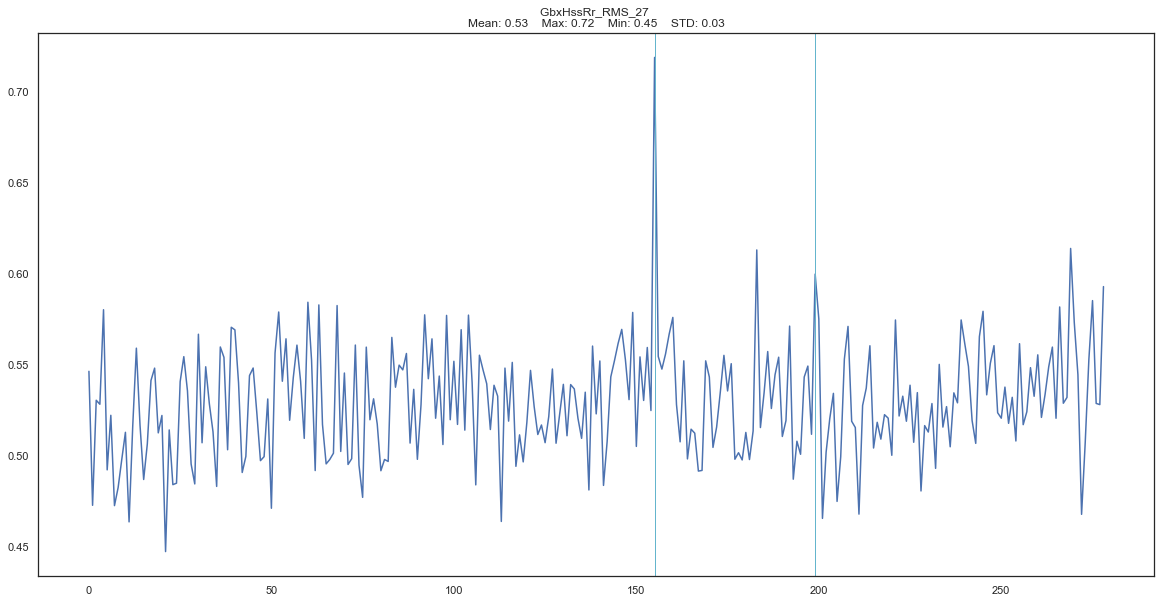

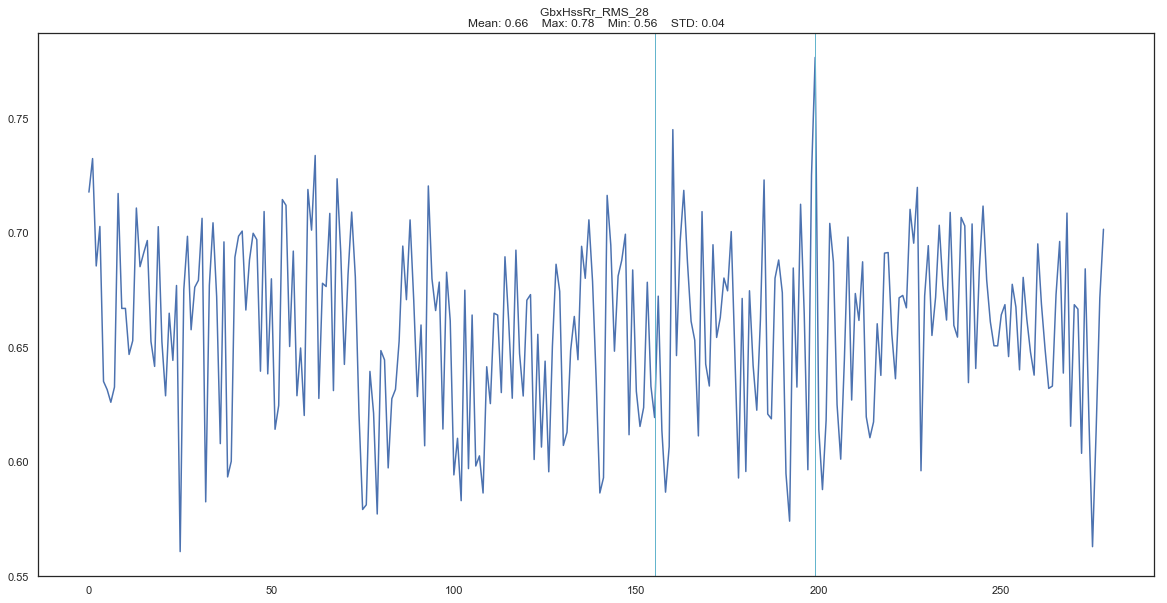

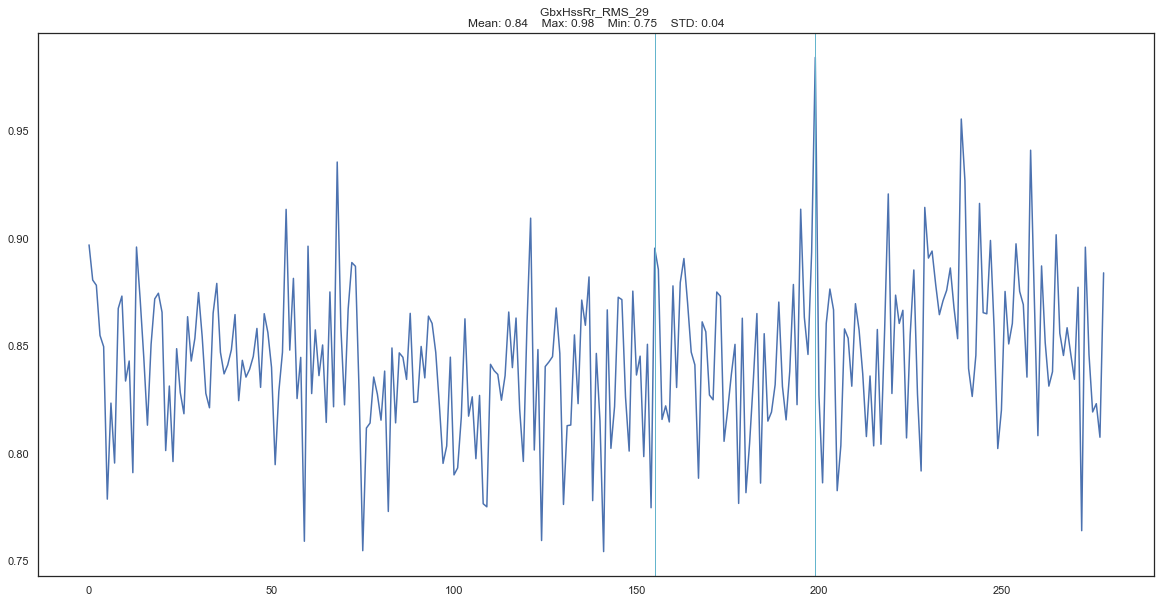

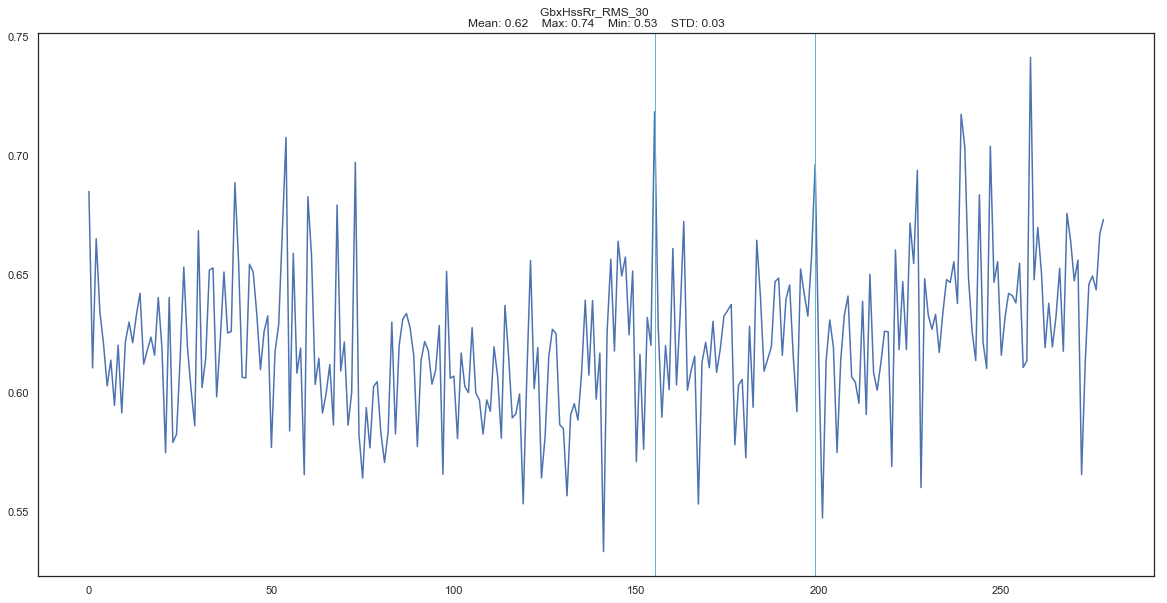

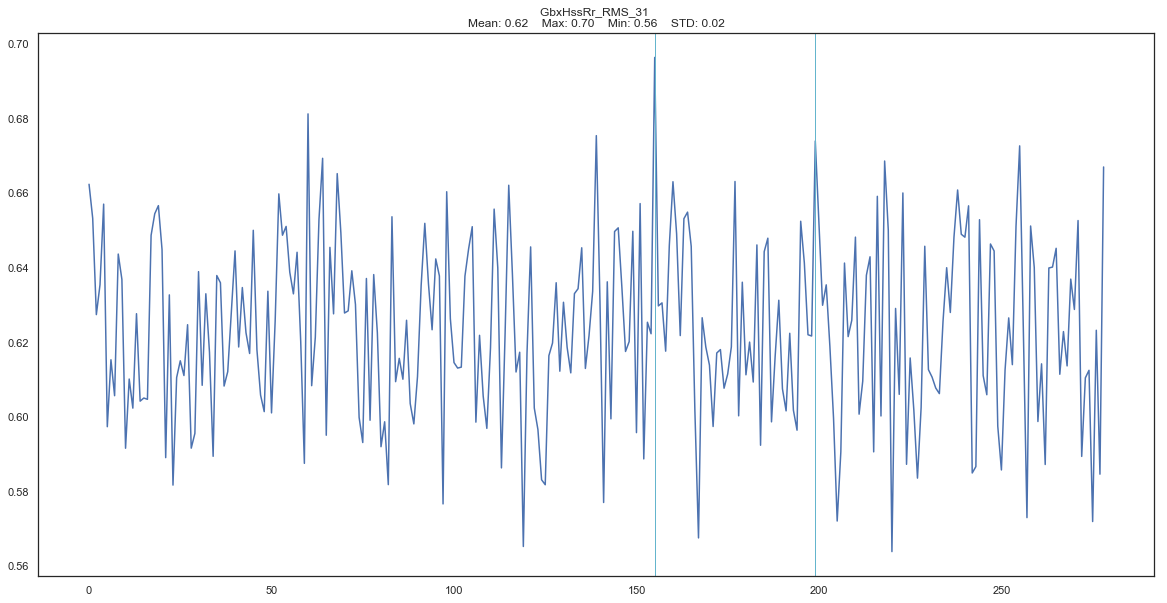

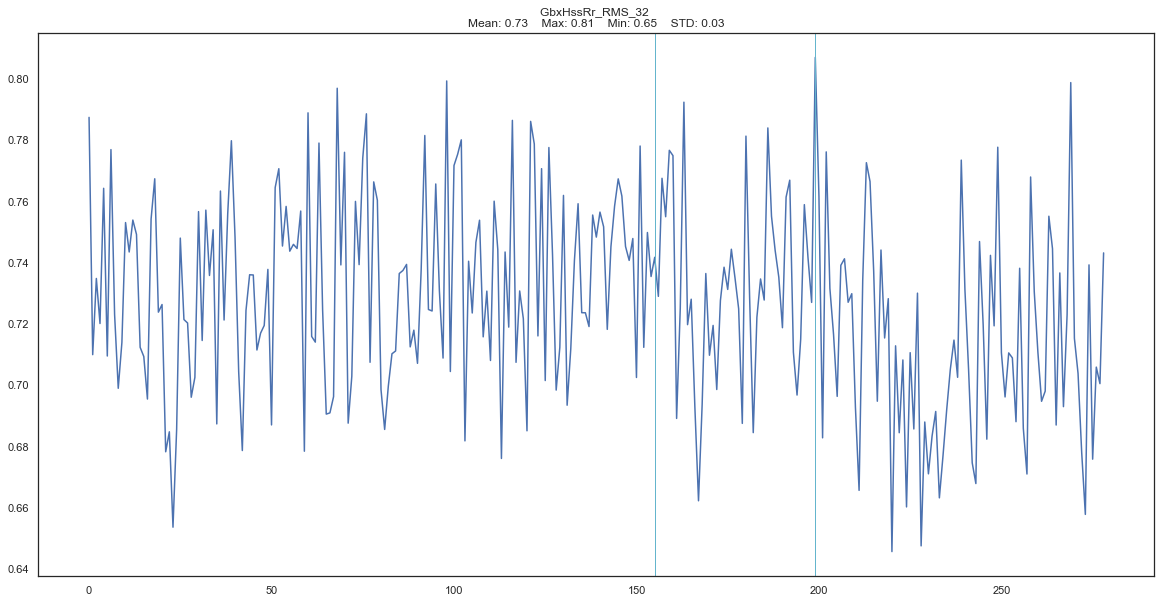

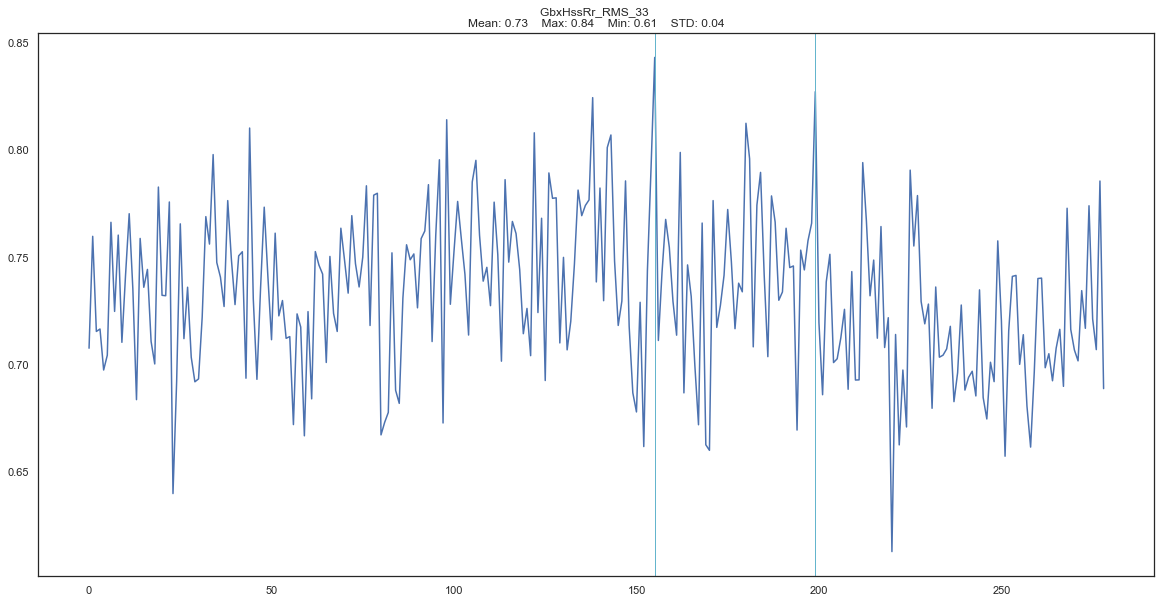

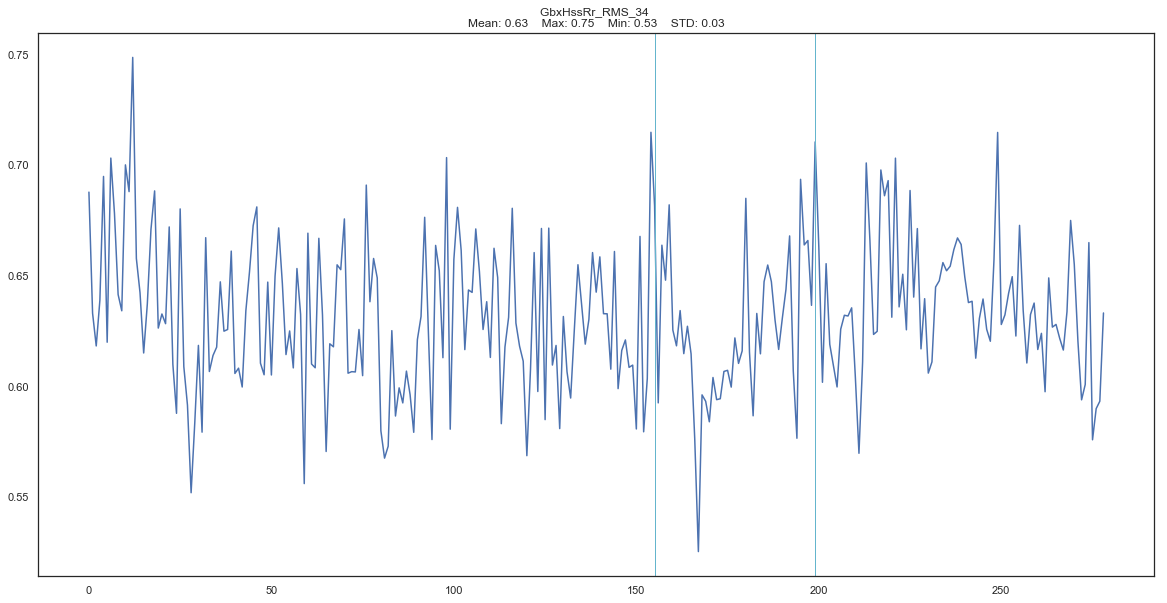

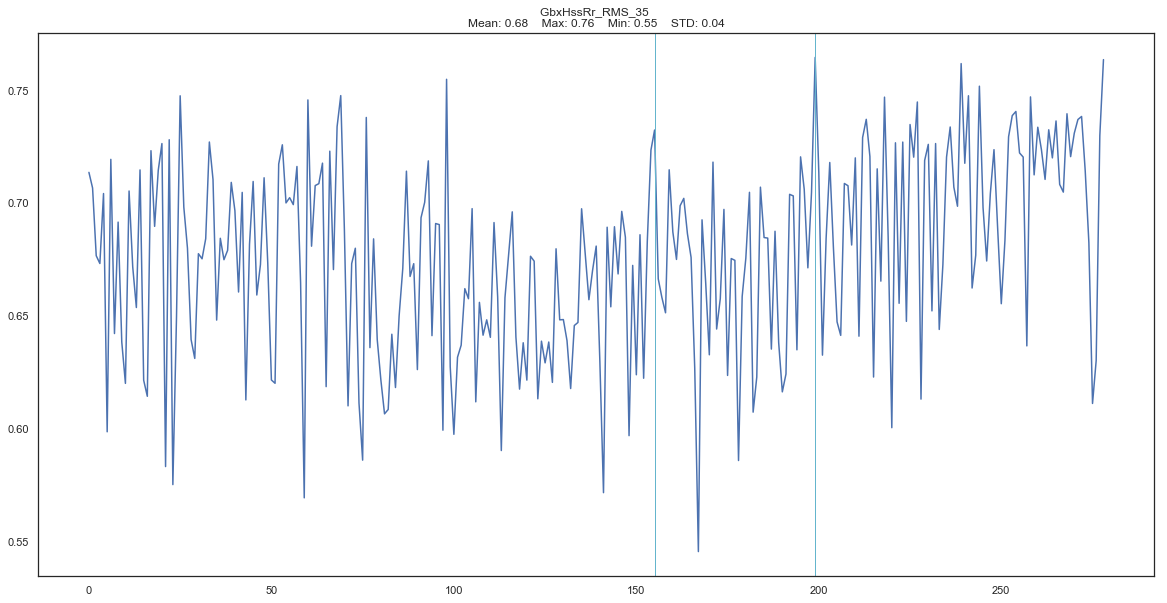

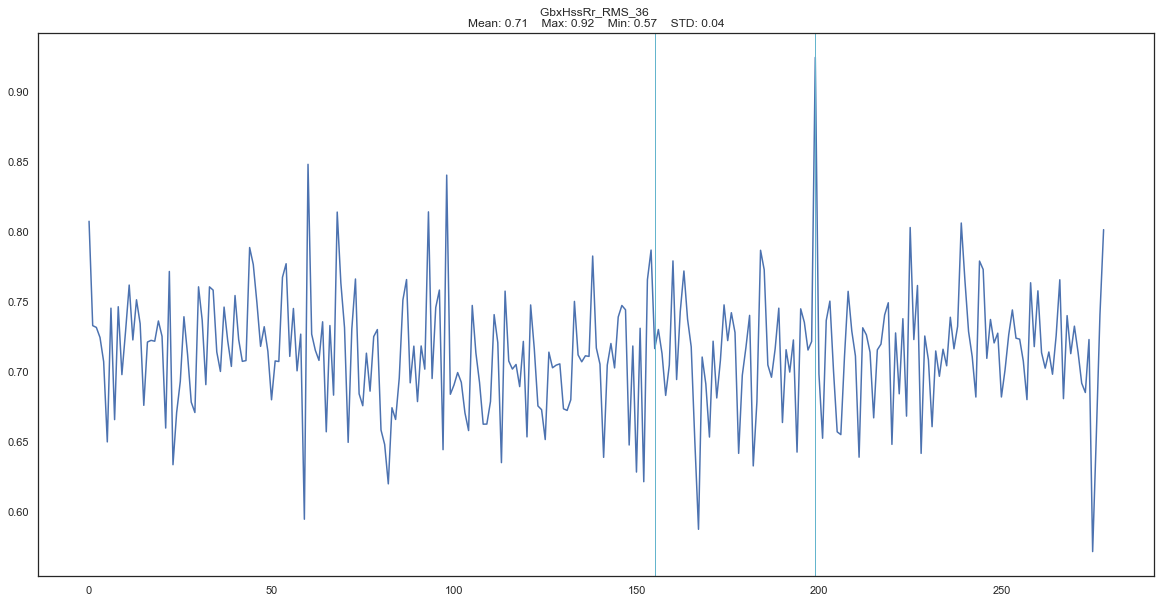

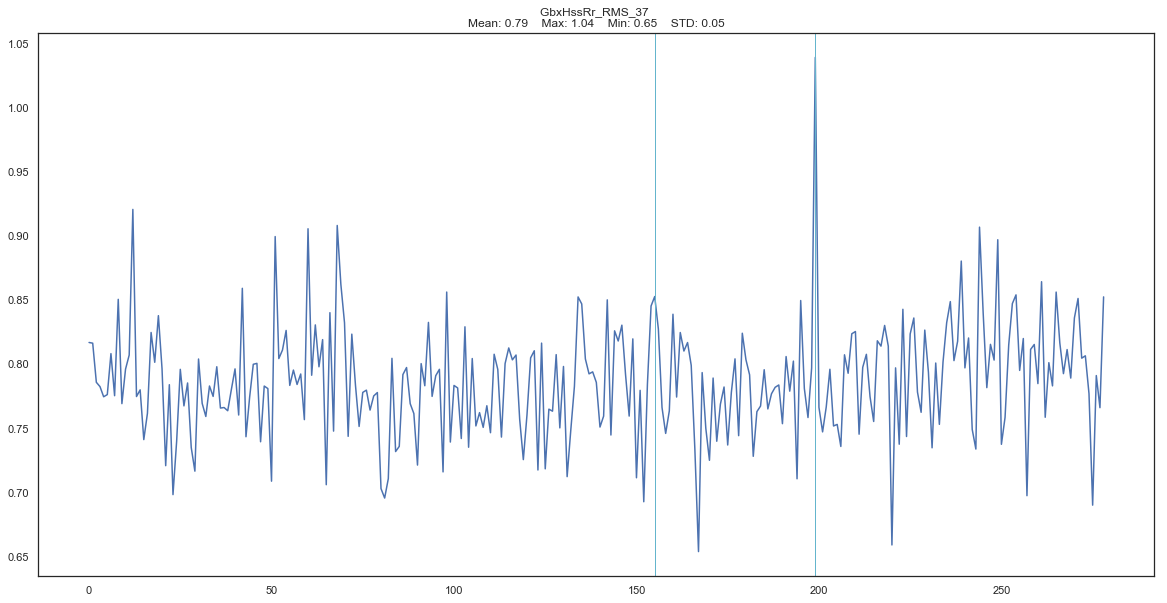

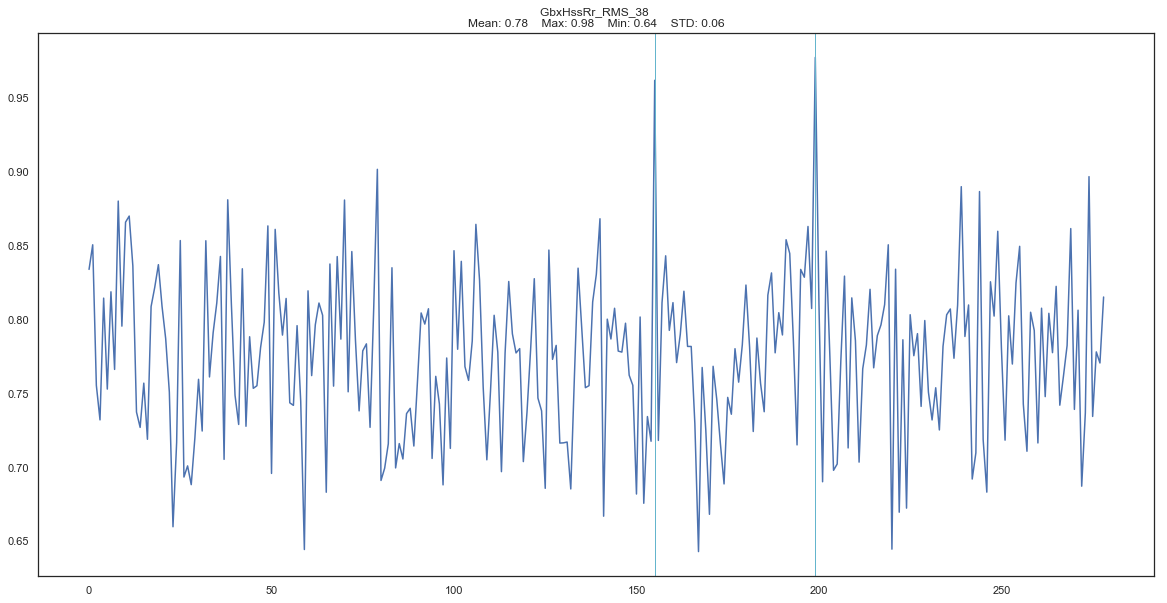

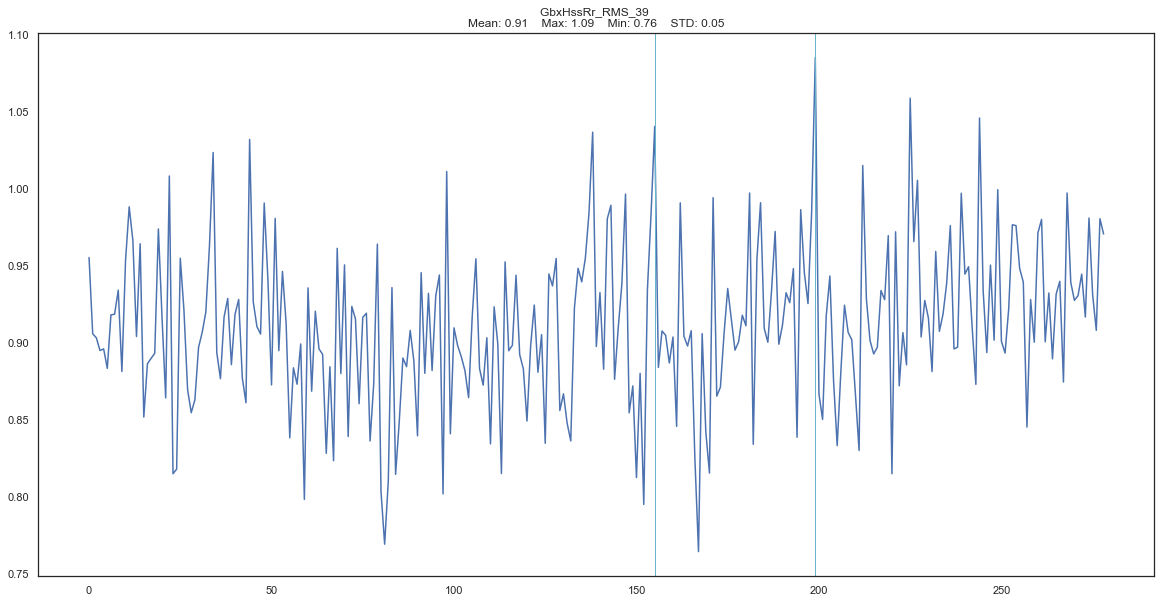

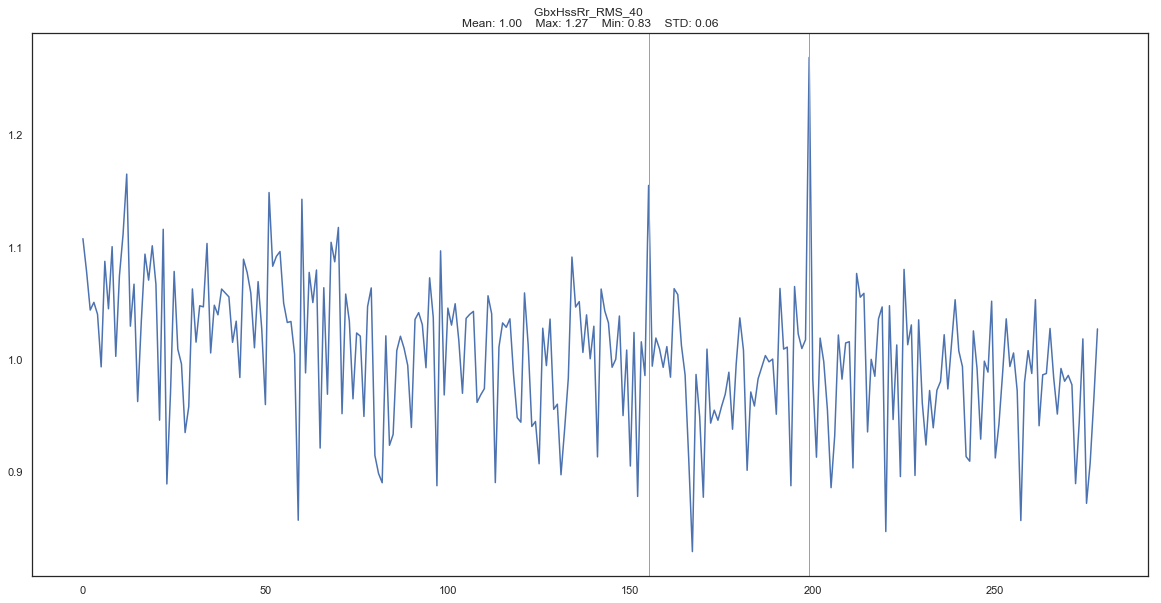

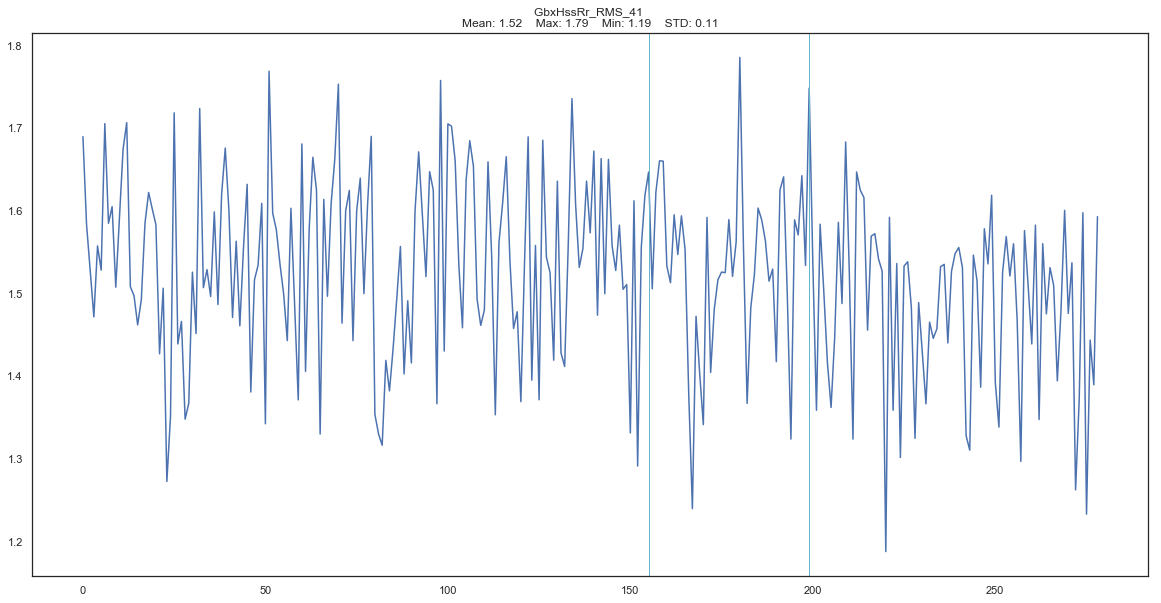

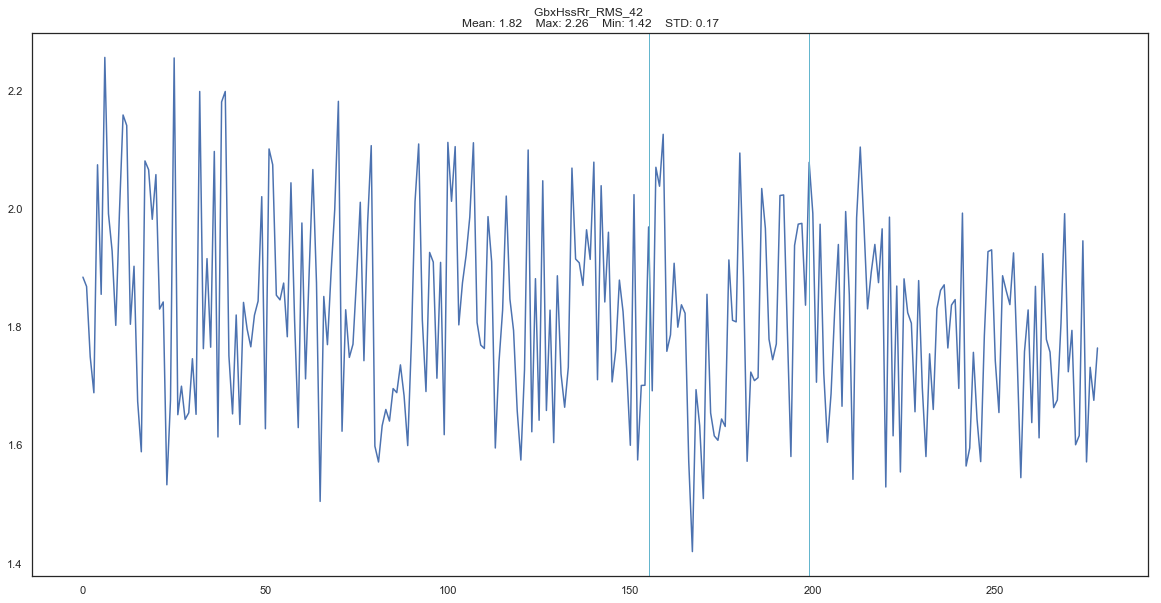

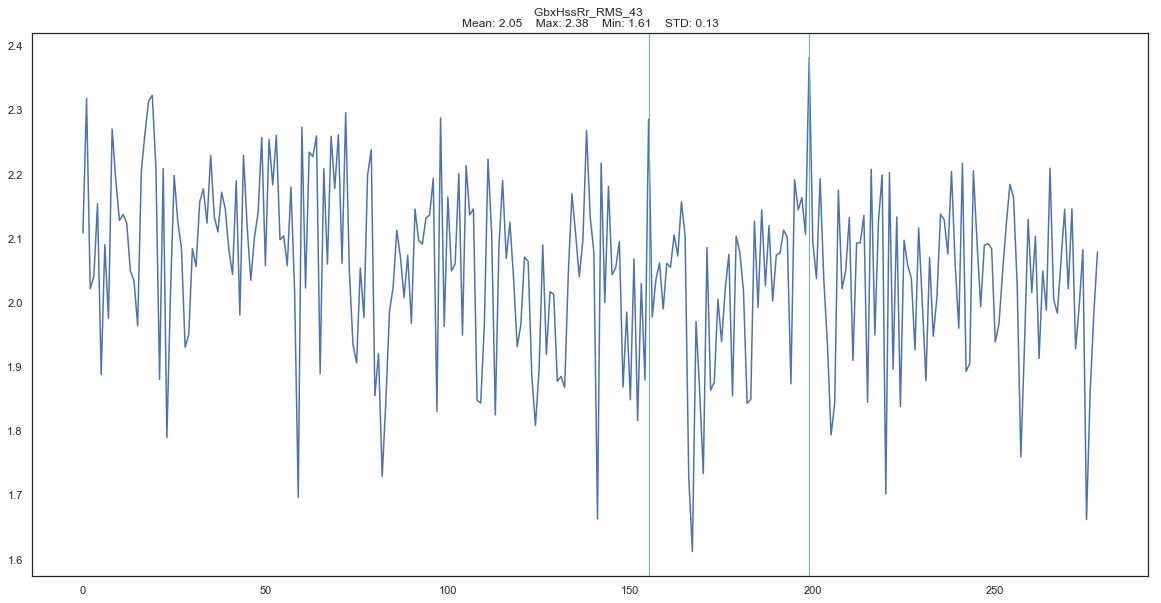

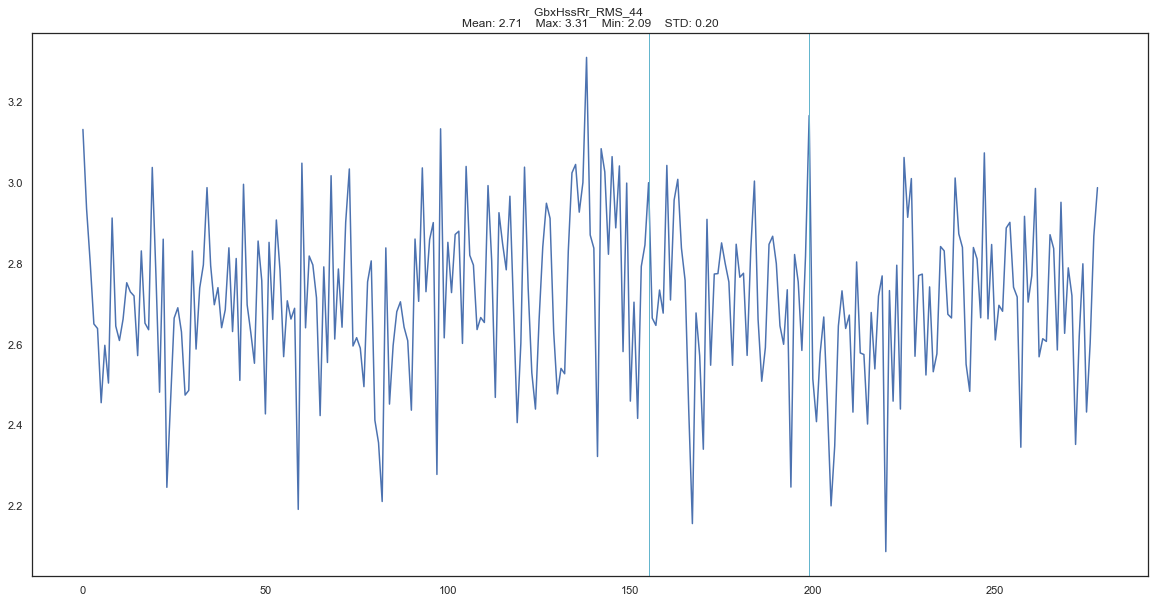

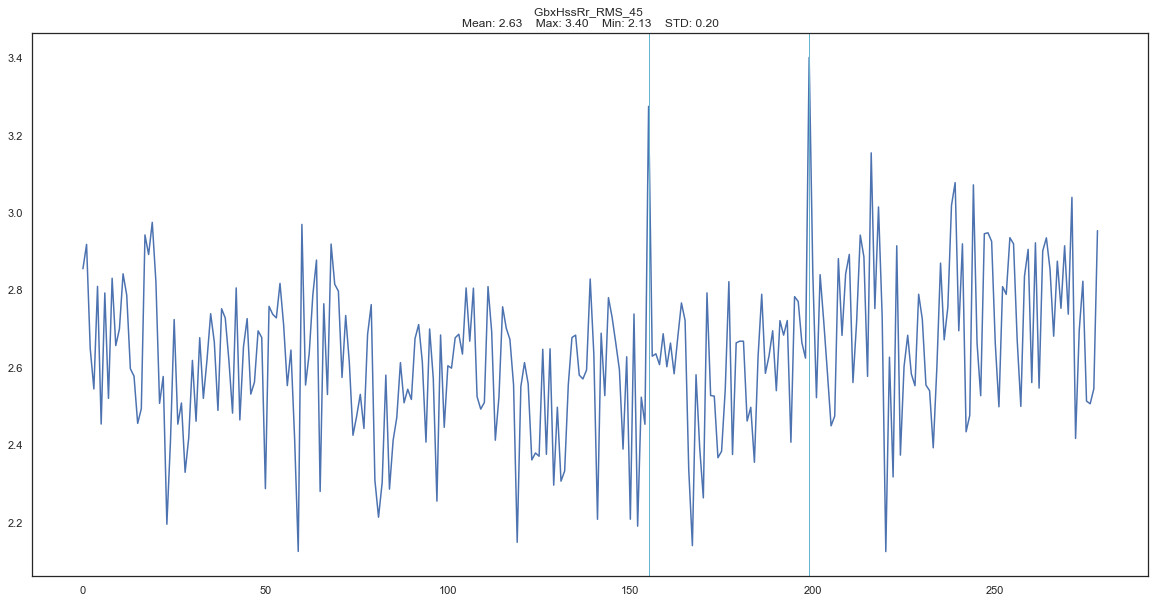

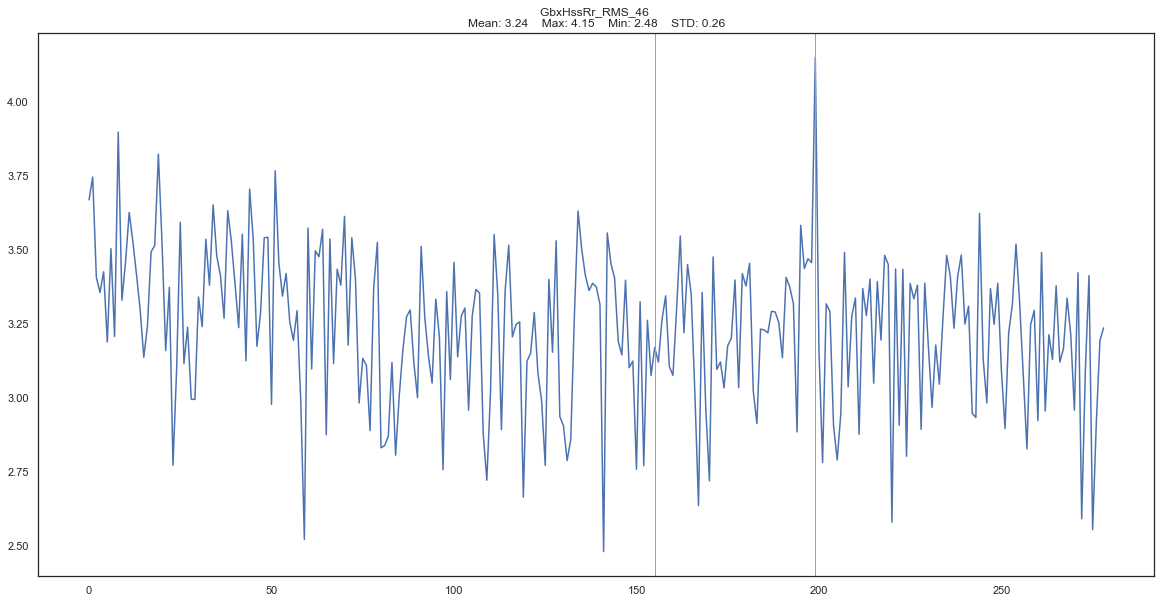

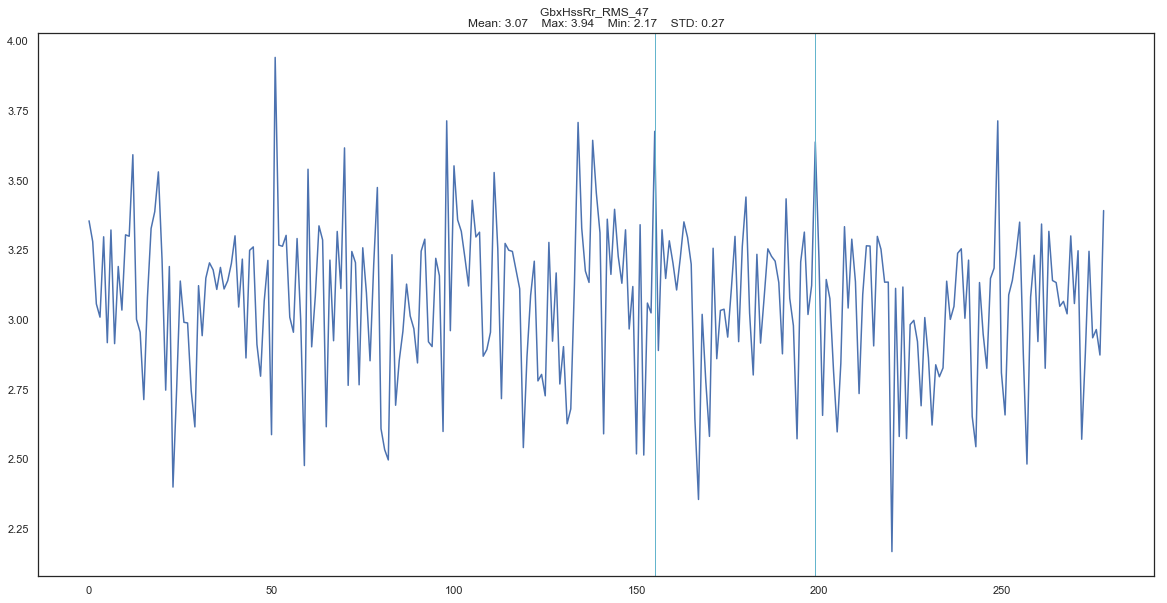

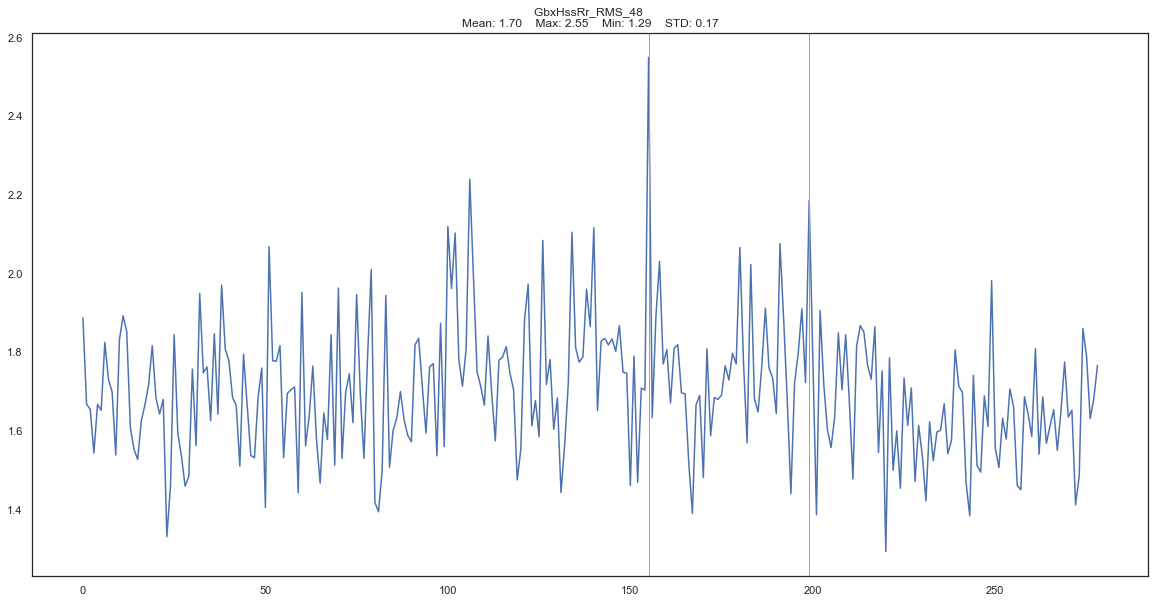

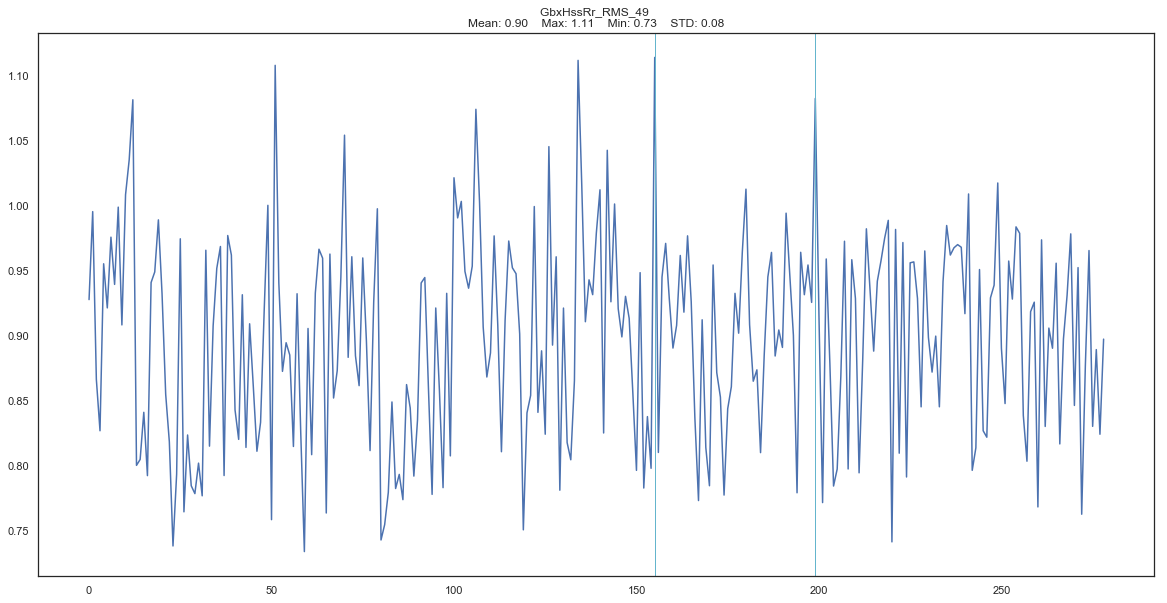

In [9]:
x=np.arange(len(data))
for i, name in enumerate(data.columns):
    plt.figure(figsize=(20,10))
    y = data.values[:,i]
    mean_val = np.mean(y)
    max_val = np.max(y)
    min_val = np.min(y)
    std_val = np.std(y)
    plt.title(f'{name} \nMean: {mean_val:.2f}    Max: {max_val:.2f}    Min: {min_val:.2f}    STD: {std_val:.2f}')
    plt.plot(x, y)
    plt.axvline(x=155,  c='c', linewidth=1)
    plt.axvline(x=199, c='c', linewidth=1)
    plt.show()

In [10]:
%autoreload
import build_dataset

## Plot frequency spectrum of interesting data points
Use AvgPower value to find the correct interval

In [7]:
interesting_intervals = [20, 21, 22, 23, 24, 155, 199]
pwr_values = []
for interval in interesting_intervals:
    pwr_values.append(float(f"{data.iloc[interval]['AvgPower']:.9f}"))

pwr_values

[2661.200439453,
 2509.962890625,
 2639.836914063,
 3307.696289063,
 3010.144287109,
 2601.592285156,
 3214.307617188]

This is sensor name GbxHssRr;0,0102;m/s2
Type of component registered when building dataset is gearbox.
33


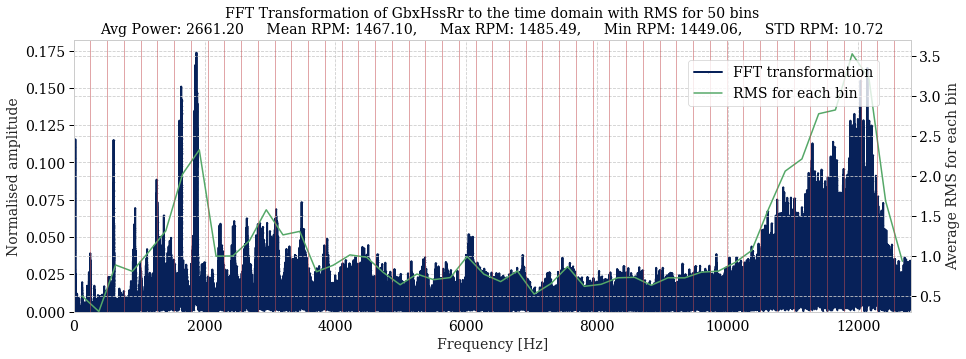

34


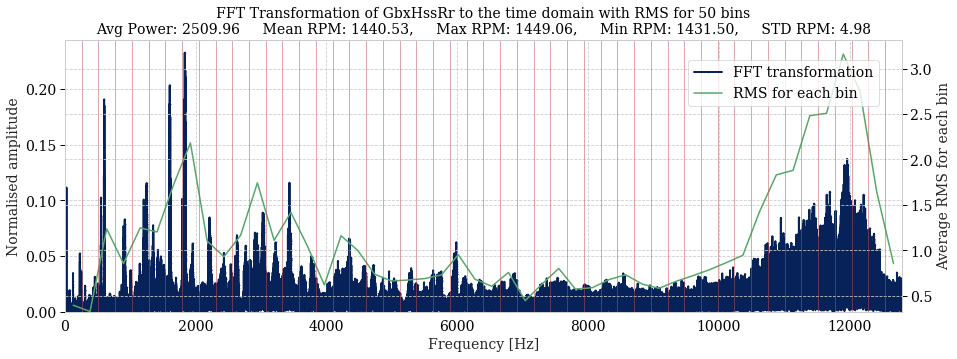

36


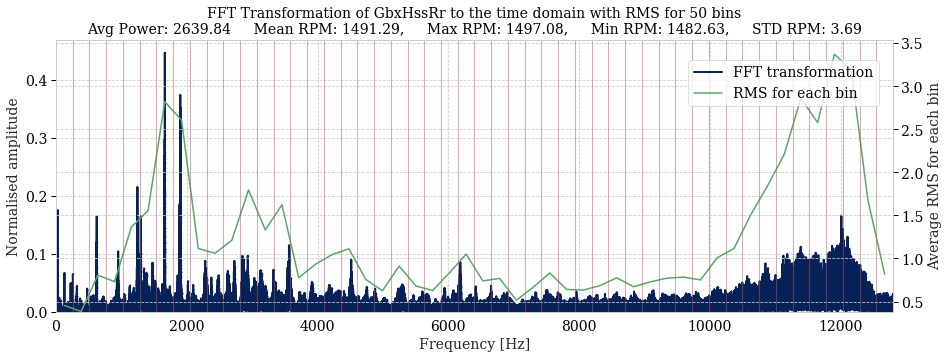

37


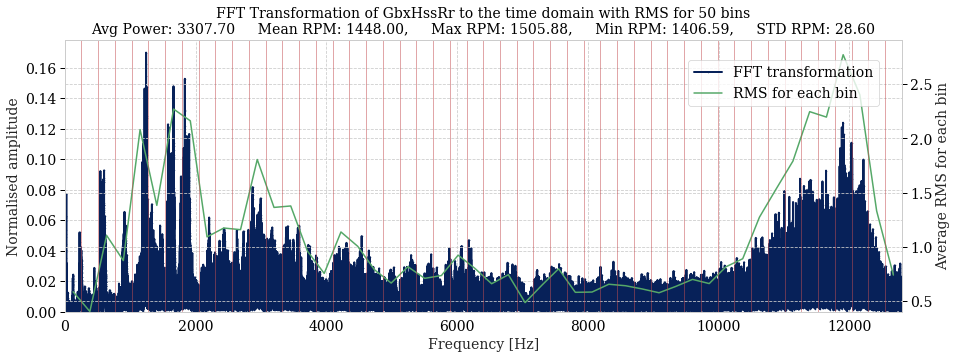

38


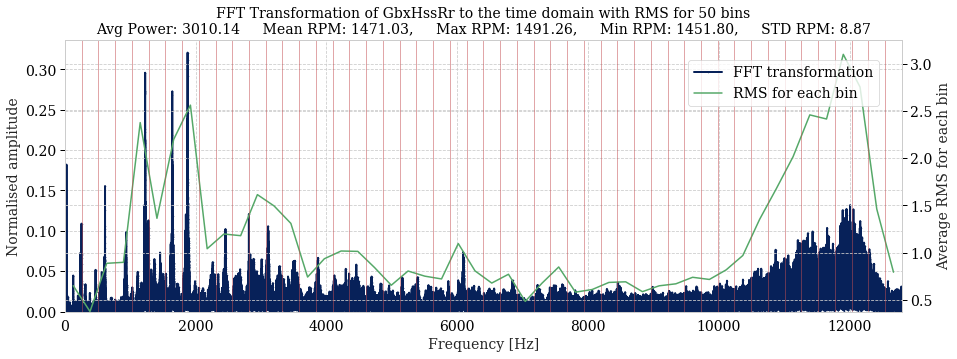

219


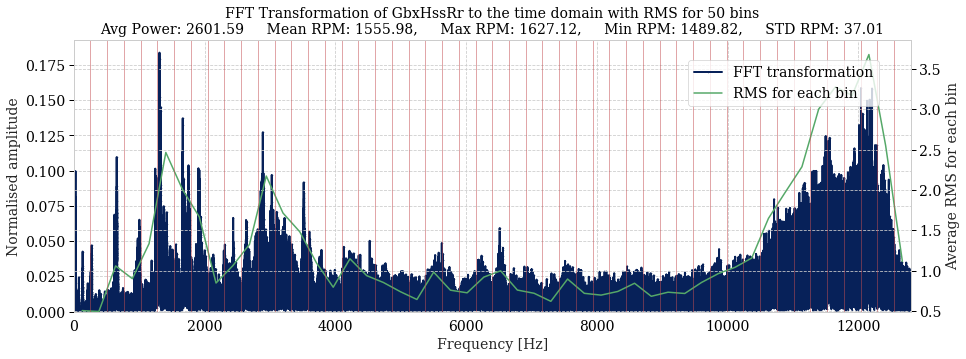

290


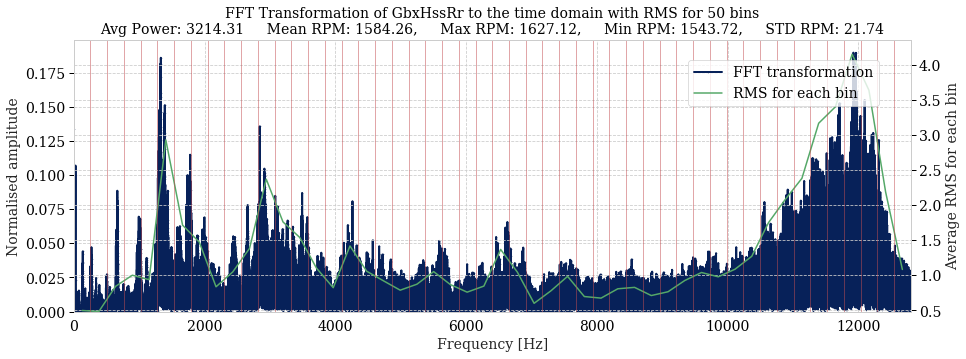

7 / 414 intervals added to dataframe


In [8]:
df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=2500,plot=True, bins=50, 
                                                         plot_vertical_lines=True,
                                                         avg_pwr_values = pwr_values)